In [1]:
%pylab inline
from landlab import RasterModelGrid
from landlab.plot.imshow import imshow_grid_at_node
from landlab.components import PresFlowNetwork, MeltCreep
import numpy as np
from matplotlib import colors,  cm
import matplotlib.animation as animation
from landlab.components.conduit_networks.calcite import calcite_diss_palmer_transfer

from PIL import Image
from PIL import ImageDraw

def plot_links(grid, value_name, autoscale=True, 
               vmin=0., vmax=0., cmap_name='viridis', 
               magnitude= False, lw=5, 
               pixels_per_node=31, x_name='X', 
               y_name='Y', var_name='', use_PIL=True):#, logvalues=False ):
    if use_PIL:
        pixel_xscaling_factor = pixels_per_node/grid.dx
        pixel_yscaling_factor = pixels_per_node/grid.dy
        im = Image.new('RGBA', ( int(round(grid.number_of_cell_columns*pixels_per_node)), int(round(grid.number_of_cell_rows*pixels_per_node)) ), (255,255,255,255))
        draw = ImageDraw.Draw(im)

    link_head_x = grid.node_x[grid.node_at_link_head]
    link_head_y = grid.node_y[grid.node_at_link_head]
    link_tail_x = grid.node_x[grid.node_at_link_tail]
    link_tail_y = grid.node_y[grid.node_at_link_tail]       
    if magnitude:
        values = abs(grid.at_link[value_name])
    else:
        values = grid.at_link[value_name]
    #if logvalues:
    #    values = np.log10(abs(grid.at_link[value_name]))
    
    
    
    #Normalize color values
    if autoscale:
        cnorm = colors.Normalize()
        cnorm.autoscale(values)
    else:
        cnorm = colors.Normalize(vmin,vmax)
    scalarMap = cm.ScalarMappable(norm=cnorm, cmap = get_cmap(cmap_name))
    scalarMap.set_array(values)
    #set_cmap()
    if use_PIL:
        for i, value in enumerate(values):
            draw.line( ((link_head_x[i]*pixel_xscaling_factor,link_head_y[i]*pixel_yscaling_factor),(link_tail_x[i]*pixel_xscaling_factor,link_tail_y[i]*pixel_yscaling_factor)),fill=scalarMap.to_rgba(value,bytes=True),width=lw) 
        imshow(np.asarray(im), origin='lower', extent=(0,grid.number_of_cell_columns,0,grid.number_of_cell_rows))
    else:
        for i, value in enumerate(values):
            xs = [link_head_x[i],link_tail_x[i]]
            ys = [link_head_y[i],link_tail_y[i]]
            img = plot(xs,ys,lw=lw,color=scalarMap.to_rgba(value))    
    cb = colorbar(scalarMap)
    cb.ax.set_ylabel(var_name)
    xlabel(x_name)
    ylabel(y_name)


Populating the interactive namespace from numpy and matplotlib


### Test case 1 (parallel conduits, head gradient boundary)

In [2]:
mg = RasterModelGrid((5,10),100)
junc_elev = mg.add_zeros('node', 'junction__elevation')
R = mg.add_zeros('node', 'input__discharge')
h = mg.add_zeros('node', 'hydraulic__head')
Q = mg.add_zeros('link', 'conduit__discharge')
mg.add_zeros('node','storage')
mg.at_node['storage']=10.*np.ones(mg.number_of_nodes)

#mg.at_node['junction__elevation'] = -0.01*mg.node_x + 4.

w = mg.add_zeros('link','width')
mg.at_link['width']= 1.0*np.ones(mg.number_of_links)#.*np.random.rand(mg.number_of_active_links)

d_h = mg.add_zeros('link','hydraulic__diameter')
mg.at_link['hydraulic__diameter'] =  mg.at_link['width'].copy()

#mg.at_node['input__discharge'][12]=0.05

#Set up link elevation offsets
xc_min_head = mg.add_zeros('link', 'conduit_head__offset')
xc_min_tail = mg.add_zeros('link', 'conduit_tail__offset')
y_max = mg.add_zeros('link', 'maximum__depth')
mg.at_link['maximum__depth']= mg.at_link['width']#applicable for square conduits

#print(mg.at_link['maximum__depth'])

#set heads at edges
h[mg.nodes_at_top_edge] = 0.
h[mg.nodes_at_bottom_edge] = 0.
h[mg.nodes_at_left_edge] = 10.
h[mg.nodes_at_right_edge] = 0.


mg.set_closed_boundaries_at_grid_edges(False,True,False,True)
Q[mg.active_links] = 0.1#0.1*np.random.rand(mg.number_of_active_links)
n_core = mg.number_of_core_nodes
links = mg.links_at_node
print("Number of links = ", mg.number_of_links)
print("Number of nodes = ", mg.number_of_nodes)
print("Number of active links = ", mg.number_of_active_links)
print("Number of core nodes = ", mg.number_of_core_nodes)

pfn = PresFlowNetwork(mg)

for i in arange(300):
    print('Time iteration:', i)
    pfn.dyn_wave_solution(dt=5., outflow_bnd_type = 'normal')
    


Number of links =  85
Number of nodes =  50
Number of active links =  43
Number of core nodes =  24
Time iteration: 0
max change in h:  0.133319787859
max change in h:  0.0996264832639
max change in h:  0.0717336852711
max change in h:  0.0506098026819
max change in h:  0.0351741134157
max change in h:  0.0241490808613
max change in h:  0.016412973378
max change in h:  0.0110633456814
max change in h:  0.00740830316112
max change in h:  0.00495735009404
max change in h:  0.00336679880566
max change in h:  0.0023021320841
max change in h:  0.00159239844787
max change in h:  0.00109947218969
max change in h:  0.000757843380702
max change in h:  0.000521532044427
max change in h:  0.00035836611691
max change in h:  0.00024589622025
max change in h:  0.000168495483002
max change in h:  0.000115310190542
max change in h:  7.88172530739e-05
average dh= 0.069403173553   average abs(dQ)= 0.242247314262
Time iteration: 1
max change in h:  0.363944052271
max change in h:  0.174059872104
max chan

Entering normal flow calc.
slope= [ 0.]   Q= [-0.00010728]
max change in h:  0.0791221138849
Entering normal flow calc.
slope= [ 0.]   Q= [-0.00011054]
max change in h:  0.0354858768004
Entering normal flow calc.
slope= [ 0.]   Q= [-0.00011194]
max change in h:  0.0195284715266
Entering normal flow calc.
slope= [ 0.]   Q= [-0.00011259]
max change in h:  0.010599583065
Entering normal flow calc.
slope= [ 0.]   Q= [-0.00011294]
max change in h:  0.00560953563045
Entering normal flow calc.
slope= [ 0.]   Q= [-0.00011318]
max change in h:  0.00289007872622
Entering normal flow calc.
slope= [ 0.]   Q= [-0.00011335]
max change in h:  0.00144889368551
Entering normal flow calc.
slope= [ 0.]   Q= [-0.00011348]
max change in h:  0.00070686165717
Entering normal flow calc.
slope= [ 0.]   Q= [-0.00011358]
max change in h:  0.000335665179306
Entering normal flow calc.
slope= [ 0.]   Q= [-0.00011366]
max change in h:  0.000170036295306
Entering normal flow calc.
slope= [ 0.]   Q= [-0.00011372]
max 

max change in h:  0.00143854423493
Entering normal flow calc.
slope= [ 0.]   Q= [-0.16039391]
Entering normal flow calc.
slope= [ 0.]   Q= [-0.1462213]
Entering normal flow calc.
slope= [ 0.]   Q= [-0.1329861]
max change in h:  0.000538984609589
Entering normal flow calc.
slope= [ 0.]   Q= [-0.16108697]
Entering normal flow calc.
slope= [ 0.]   Q= [-0.14695184]
Entering normal flow calc.
slope= [ 0.]   Q= [-0.1337626]
max change in h:  0.00022409810217
Entering normal flow calc.
slope= [ 0.]   Q= [-0.16141779]
Entering normal flow calc.
slope= [ 0.]   Q= [-0.14730066]
Entering normal flow calc.
slope= [ 0.]   Q= [-0.1341365]
max change in h:  0.000110320221568
Entering normal flow calc.
slope= [ 0.]   Q= [-0.16157034]
Entering normal flow calc.
slope= [ 0.]   Q= [-0.1474614]
Entering normal flow calc.
slope= [ 0.]   Q= [-0.13430969]
max change in h:  5.44912977101e-05
average dh= 0.12632660117   average abs(dQ)= 0.0268860777782
Time iteration: 21
Entering normal flow calc.
slope= [ 0.]

max change in h:  0.00879771241539
max change in h:  0.00433762568481
max change in h:  0.00213354594158
max change in h:  0.00104736994558
max change in h:  0.000513320664987
max change in h:  0.000251238989548
max change in h:  0.000122829035001
max change in h:  5.99970916602e-05
average dh= 0.0246197864862   average abs(dQ)= 0.00380327351225
Time iteration: 50
max change in h:  0.00843188185719
max change in h:  0.00415383130724
max change in h:  0.00204097577324
max change in h:  0.00100069096576
max change in h:  0.000489791538005
max change in h:  0.000239402316017
max change in h:  0.000116895081212
max change in h:  5.71614633804e-05
average dh= 0.0235156516487   average abs(dQ)= 0.0035907299283
Time iteration: 51
max change in h:  0.00806186762812
max change in h:  0.003968294924
max change in h:  0.0019480678853
max change in h:  0.000954268859726
max change in h:  0.00046666710436
max change in h:  0.000227927374942
max change in h:  0.000111593259888
max change in h:  5.47

max change in h:  0.000375117720602
max change in h:  0.000184246332932
max change in h:  9.03811512307e-05
average dh= 0.00442281928771   average abs(dQ)= 0.000658919286747
Time iteration: 88
max change in h:  0.00148190204796
max change in h:  0.000730292632777
max change in h:  0.00035912583468
max change in h:  0.000176305276259
max change in h:  8.64384351882e-05
average dh= 0.00423004961295   average abs(dQ)= 0.000628624418276
Time iteration: 89
max change in h:  0.00141855099638
max change in h:  0.000698845019228
max change in h:  0.000343530857192
max change in h:  0.000168579685809
max change in h:  8.26159177247e-05
average dh= 0.00404554968718   average abs(dQ)= 0.000598612661461
Time iteration: 90
max change in h:  0.00135650284453
max change in h:  0.000668091402893
max change in h:  0.000328324858778
max change in h:  0.000161078262495
max change in h:  7.89235340735e-05
average dh= 0.00386901818859   average abs(dQ)= 0.00057283749376
Time iteration: 91
max change in h: 

max change in h:  0.000162395320768
max change in h:  7.99476284481e-05
average dh= 0.000468405086182   average abs(dQ)= 7.18828396287e-05
Time iteration: 140
max change in h:  0.000156142830202
max change in h:  7.69287202003e-05
average dh= 0.000450089669137   average abs(dQ)= 6.91418641347e-05
Time iteration: 141
max change in h:  0.000150238150682
max change in h:  7.40030522408e-05
average dh= 0.000432467880944   average abs(dQ)= 6.63647614541e-05
Time iteration: 142
max change in h:  0.000144488701797
max change in h:  7.11527345025e-05
average dh= 0.000415521756624   average abs(dQ)= 6.35966083149e-05
Time iteration: 143
max change in h:  0.000138867063564
max change in h:  6.83676751887e-05
average dh= 0.000399230637752   average abs(dQ)= 6.10202341756e-05
Time iteration: 144
max change in h:  0.000133364870143
max change in h:  6.5646644547e-05
average dh= 0.000383572525576   average abs(dQ)= 5.88677054785e-05
Time iteration: 145
max change in h:  0.000127992395335
max change 

average dh= 1.13400650791e-05   average abs(dQ)= 2.13308395645e-06
Time iteration: 246
max change in h:  3.86586678047e-06
average dh= 1.09552802647e-05   average abs(dQ)= 2.06955964754e-06
Time iteration: 247
max change in h:  3.86233742411e-06
average dh= 1.05835517558e-05   average abs(dQ)= 1.95397649073e-06
Time iteration: 248
max change in h:  3.83302851592e-06
average dh= 1.02244365332e-05   average abs(dQ)= 1.79465594957e-06
Time iteration: 249
max change in h:  3.76456288009e-06
average dh= 9.87750660956e-06   average abs(dQ)= 1.60632983238e-06
Time iteration: 250
max change in h:  3.64971639133e-06
average dh= 9.54234852025e-06   average abs(dQ)= 1.52836106749e-06
Time iteration: 251
max change in h:  3.48839635578e-06
average dh= 9.21856282986e-06   average abs(dQ)= 1.61634403044e-06
Time iteration: 252
max change in h:  3.28761309287e-06
average dh= 8.9057636564e-06   average abs(dQ)= 1.67771208117e-06
Time iteration: 253
max change in h:  3.06045179599e-06
average dh= 8.603

Node net fluxes =  [  6.94381402e-07   1.30504171e-06   1.75834250e-06   1.99960272e-06
   1.99969720e-06   1.75858174e-06   1.30531376e-06   6.94558973e-07
   1.66716546e-06   3.13324074e-06   4.22139267e-06   4.80037504e-06
   4.80035847e-06   4.22135069e-06   3.13319301e-06   1.66713430e-06
   2.63994659e-06   4.96143404e-06   6.68443458e-06   7.60113726e-06
   7.60100886e-06   6.68410945e-06   4.96106431e-06   2.63970526e-06]
Node head =  [ 10.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
  10.           8.9999819    7.99996599   6.99995418   5.9999479
   4.9999479    3.99995418   2.99996599   1.9999819    1.
  10.           8.99998185   7.99996588   6.99995404   5.99994773
   4.99994773   3.99995404   2.99996588   1.99998185   1.
  10.           8.99998179   7.99996578   6.99995389   5.99994757
   4.99994757   3.99995389   2.99996578   1.99998179   1.
  10.           0.           0.           0.           0.
   0.   

Text(0, 0.5, 'D_H')

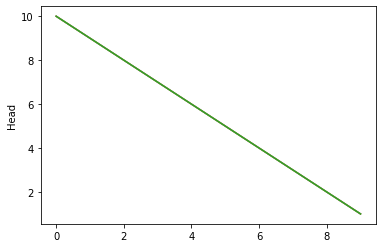

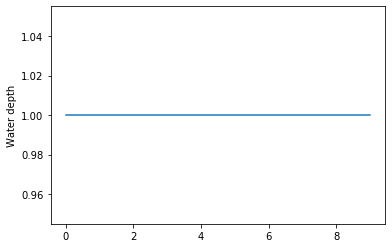

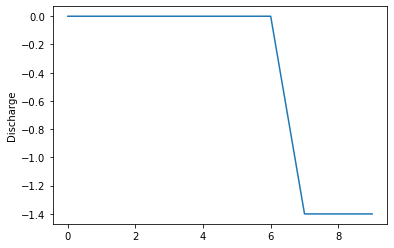

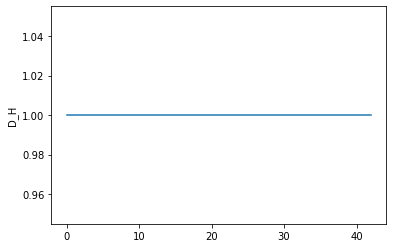

In [3]:
print("Node net fluxes = ",mg.calc_net_flux_at_node(Q)[mg.core_nodes]/mg.dx - mg.at_node['input__discharge'][mg.core_nodes])
print("Node head = ",h)

figure()
plot(h[10:20])
plot(h[20:30])
plot(h[30:40])
ylabel('Head')

print('Discharge=',Q[mg.active_links])
#Discharge from DW equation
L = max(mg.node_x)
deltaH = max(h[mg.nodes_at_left_edge]) - min(h[mg.nodes_at_right_edge])
f=0.1
g=9.8
D_H = 1. 
print('DW discharge = ', D_H**2.*sqrt(2*g*D_H*deltaH/f/L))


figure()
water_depth = mg.at_node['hydraulic__head'][10:20] - mg.at_node['junction__elevation'][10:20]
water_depth[water_depth>1.] = 1.
plot(water_depth)
ylabel('Water depth')


figure()
plot(Q[mg.active_links][10:20])
ylabel('Discharge')

figure()
plot(mg.at_link['hydraulic__diameter'][mg.active_links])
ylabel('D_H')



Normal flow boundary fails in this case, as there is zero slope. Outfall (or fixed head) might be more appropriate here.

### Test Case 2 (single conduit, recharge boundary)

In [6]:
mg = RasterModelGrid((3,10),100)
junc_elev = mg.add_zeros('node', 'junction__elevation')
R = mg.add_zeros('node', 'input__discharge')
h = mg.add_zeros('node', 'hydraulic__head')
Q = mg.add_zeros('link', 'conduit__discharge')
mg.add_zeros('node','storage')
mg.at_node['storage']=10.*np.ones(mg.number_of_nodes)

#mg.at_node['junction__elevation'] = -0.01*mg.node_x + 4.

w = mg.add_zeros('link','width')
mg.at_link['width']= 1.0*np.ones(mg.number_of_links)#.*np.random.rand(mg.number_of_active_links)

d_h = mg.add_zeros('link','hydraulic__diameter')
mg.at_link['hydraulic__diameter'] = mg.at_link['width'].copy()

mg.at_node['input__discharge'][11]=1.475

#Set up link elevation offsets
xc_min_head = mg.add_zeros('link', 'conduit_head__offset')
xc_min_tail = mg.add_zeros('link', 'conduit_tail__offset')
y_max = mg.add_zeros('link', 'maximum__depth')
mg.at_link['maximum__depth']= mg.at_link['width']#applicable for square conduits

#print(mg.at_link['maximum__depth'])

#set heads at edges
h[mg.nodes_at_top_edge] = 0.
h[mg.nodes_at_bottom_edge] = 0.
h[mg.nodes_at_left_edge] = 10.
h[mg.nodes_at_right_edge] = 0.


mg.set_closed_boundaries_at_grid_edges(False,True,True,True)
Q[mg.active_links] = 0.1#0.1*np.random.rand(mg.number_of_active_links)
n_core = mg.number_of_core_nodes
links = mg.links_at_node
print("Number of links = ", mg.number_of_links)
print("Number of nodes = ", mg.number_of_nodes)
print("Number of active links = ", mg.number_of_active_links)
print("Number of core nodes = ", mg.number_of_core_nodes)

pfn = PresFlowNetwork(mg)

for i in arange(500):
    print('Time iteration:', i)
    pfn.dyn_wave_solution(dt=10.,outflow_bnd_type='normal')
    


Number of links =  47
Number of nodes =  30
Number of active links =  8
Number of core nodes =  8
Time iteration: 0
max change in h:  0.358597711019
max change in h:  0.133752246008
max change in h:  0.0536795122073
max change in h:  0.0406897141127
max change in h:  0.027090033916
max change in h:  0.0165157250412
max change in h:  0.00940989482334
max change in h:  0.00507617225229
max change in h:  0.00261831354582
max change in h:  0.00130172897964
max change in h:  0.000628061450891
max change in h:  0.000295879970812
max change in h:  0.000136883760508
max change in h:  6.25422011264e-05
average dh= 0.190625196165   average abs(dQ)= 0.147033469017
Time iteration: 1
max change in h:  0.188210884379
max change in h:  0.0992429994833
max change in h:  0.0507376956525
max change in h:  0.022763495259
max change in h:  0.0172655026783
max change in h:  0.0116460472543
max change in h:  0.00710660707314
max change in h:  0.00397075925106
max change in h:  0.00204660411455
max change in

max change in h:  0.00947218661556
max change in h:  0.00466982283636
max change in h:  0.00230179951497
max change in h:  0.00113492271696
max change in h:  0.000559930588668
max change in h:  0.000276474580097
max change in h:  0.000136651432214
max change in h:  6.76309899506e-05
average dh= 0.130337643239   average abs(dQ)= 0.0224960204728
Time iteration: 14
max change in h:  0.0376415493099
max change in h:  0.0186031788595
max change in h:  0.00918350387336
max change in h:  0.00453230868571
max change in h:  0.00223753276106
max change in h:  0.00110538267064
max change in h:  0.000546584165454
max change in h:  0.000270584685061
max change in h:  0.000134137783961
max change in h:  6.65969542721e-05
average dh= 0.118559040713   average abs(dQ)= 0.021175234264
Time iteration: 15
max change in h:  0.0365209176732
max change in h:  0.018067683706
max change in h:  0.00893210540631
max change in h:  0.00441628201378
max change in h:  0.0021848856289
max change in h:  0.001081929889

max change in h:  0.000165542071208
max change in h:  8.16668507415e-05
average dh= 0.0302494947012   average abs(dQ)= 0.00447604721141
Time iteration: 54
max change in h:  0.0111009113256
max change in h:  0.00549342620022
max change in h:  0.00271485184384
max change in h:  0.00134064357064
max change in h:  0.000661740916946
max change in h:  0.000326551972021
max change in h:  0.000161121392773
max change in h:  7.94909232056e-05
average dh= 0.0294502628583   average abs(dQ)= 0.00433631897956
Time iteration: 55
max change in h:  0.0108021611831
max change in h:  0.00534585403942
max change in h:  0.00264206861155
max change in h:  0.0013047779051
max change in h:  0.000644075870408
max change in h:  0.00031785369084
max change in h:  0.000156838993805
max change in h:  7.73827574196e-05
average dh= 0.0286755075332   average abs(dQ)= 0.00420219463268
Time iteration: 56
max change in h:  0.0105128989021
max change in h:  0.00520295188161
max change in h:  0.00257157954446
max change 

max change in h:  0.00609050340303
max change in h:  0.00301629232065
max change in h:  0.00149193668491
max change in h:  0.00073741335223
max change in h:  0.000364323844133
max change in h:  0.000179952138588
max change in h:  8.88717540732e-05
average dh= 0.0163165341709   average abs(dQ)= 0.00222792252387
Time iteration: 78
max change in h:  0.00593952937723
max change in h:  0.00294158615366
max change in h:  0.00145501984128
max change in h:  0.000719184722046
max change in h:  0.000355327030761
max change in h:  0.000175512872204
max change in h:  8.66816301972e-05
average dh= 0.0159163908024   average abs(dQ)= 0.0021685017355
Time iteration: 79
max change in h:  0.00579263531249
max change in h:  0.00286889567356
max change in h:  0.00141909726886
max change in h:  0.000701446090568
max change in h:  0.000346571576264
max change in h:  0.000171192457744
max change in h:  8.45500227165e-05
average dh= 0.0155268315211   average abs(dQ)= 0.00211086080342
Time iteration: 80
max ch

max change in h:  9.76579175358e-05
average dh= 0.00887907682871   average abs(dQ)= 0.00116391004854
Time iteration: 103
max change in h:  0.00322013002014
max change in h:  0.00159536951671
max change in h:  0.000789453501305
max change in h:  0.000390378806353
max change in h:  0.000192959940653
max change in h:  9.53549758709e-05
average dh= 0.00867046382269   average abs(dQ)= 0.00113771439106
Time iteration: 104
max change in h:  0.00314403019846
max change in h:  0.00155767837625
max change in h:  0.000770809802221
max change in h:  0.000381163768653
max change in h:  0.000188407215655
max change in h:  9.31062603922e-05
average dh= 0.00846664631337   average abs(dQ)= 0.00111077888308
Time iteration: 105
max change in h:  0.00306976618186
max change in h:  0.00152089808611
max change in h:  0.000752616905926
max change in h:  0.000372171525196
max change in h:  0.000183964508599
max change in h:  9.09118469785e-05
average dh= 0.00826768378746   average abs(dQ)= 0.00108395365036
Ti

max change in h:  0.0016608501054
max change in h:  0.000823005912418
max change in h:  0.000407346214477
max change in h:  0.000201476584085
max change in h:  9.9611537383e-05
average dh= 0.00448409198507   average abs(dQ)= 0.000576197112758
Time iteration: 132
max change in h:  0.00162290962027
max change in h:  0.000804199262582
max change in h:  0.000398037170957
max change in h:  0.000196872542375
max change in h:  9.73355848934e-05
average dh= 0.00438195071455   average abs(dQ)= 0.000565157114578
Time iteration: 133
max change in h:  0.00158574743812
max change in h:  0.000785783996408
max change in h:  0.000388923436013
max change in h:  0.00019236553417
max change in h:  9.51077173834e-05
average dh= 0.00428187784638   average abs(dQ)= 0.000552955305675
Time iteration: 134
max change in h:  0.00154941090631
max change in h:  0.000767780037524
max change in h:  0.000380013836921
max change in h:  0.000187959622801
max change in h:  9.29298549526e-05
average dh= 0.00418400866506 

max change in h:  0.00019488029427
max change in h:  9.63999865871e-05
average dh= 0.0021486069712   average abs(dQ)= 0.00027655533419
Time iteration: 164
max change in h:  0.000776775739514
max change in h:  0.000384939313376
max change in h:  0.000190542670047
max change in h:  9.42542521418e-05
average dh= 0.00210087602619   average abs(dQ)= 0.000271280220994
Time iteration: 165
max change in h:  0.000759456917542
max change in h:  0.000376356044132
max change in h:  0.000186293996425
max change in h:  9.21526945881e-05
average dh= 0.00205409582955   average abs(dQ)= 0.000265563657971
Time iteration: 166
max change in h:  0.000742511073078
max change in h:  0.000367958494131
max change in h:  0.000182137494459
max change in h:  9.00967938104e-05
average dh= 0.00200831745394   average abs(dQ)= 0.0002597451182
Time iteration: 167
max change in h:  0.000725940176068
max change in h:  0.000359747089542
max change in h:  0.00017807321705
max change in h:  8.8086530571e-05
average dh= 0.0

max change in h:  0.00031842573059
max change in h:  0.000157795027928
max change in h:  7.81086887844e-05
average dh= 0.000862423846231   average abs(dQ)= 0.000113186496779
Time iteration: 205
max change in h:  0.000311575616118
max change in h:  0.00015440059984
max change in h:  7.64285140971e-05
average dh= 0.000843879731668   average abs(dQ)= 0.000110742545803
Time iteration: 206
max change in h:  0.000304873506289
max change in h:  0.000151079507152
max change in h:  7.4784636066e-05
average dh= 0.000825735912044   average abs(dQ)= 0.000108351709874
Time iteration: 207
max change in h:  0.000298316179284
max change in h:  0.000147830153505
max change in h:  7.31762646673e-05
average dh= 0.000807983689926   average abs(dQ)= 0.000106012863253
Time iteration: 208
max change in h:  0.00029190048248
max change in h:  0.000144650976939
max change in h:  7.16026269139e-05
average dh= 0.000790614553596   average abs(dQ)= 0.000103724877535
Time iteration: 209
max change in h:  0.000285623

max change in h:  9.93091507766e-05
average dh= 0.00027001792475   average abs(dQ)= 3.36664355789e-05
Time iteration: 261
max change in h:  9.77049122817e-05
average dh= 0.000265683271425   average abs(dQ)= 3.47004286081e-05
Time iteration: 262
max change in h:  9.60683669433e-05
average dh= 0.000261246150421   average abs(dQ)= 3.48483870224e-05
Time iteration: 263
max change in h:  9.44323507248e-05
average dh= 0.000256803625858   average abs(dQ)= 3.45919273175e-05
Time iteration: 264
max change in h:  9.28117884591e-05
average dh= 0.000252399907235   average abs(dQ)= 3.41538985749e-05
Time iteration: 265
max change in h:  9.12133198447e-05
average dh= 0.000248054746399   average abs(dQ)= 3.36373609992e-05
Time iteration: 266
max change in h:  8.96397559309e-05
average dh= 0.000243776584377   average abs(dQ)= 3.30899239424e-05
Time iteration: 267
max change in h:  8.8092141791e-05
average dh= 0.000239568637812   average abs(dQ)= 3.25335299271e-05
Time iteration: 268
max change in h:  

max change in h:  2.30396775915e-05
average dh= 6.26629037295e-05   average abs(dQ)= 8.50591664175e-06
Time iteration: 345
max change in h:  2.2641996182e-05
average dh= 6.15813323463e-05   average abs(dQ)= 8.3590591908e-06
Time iteration: 346
max change in h:  2.22511812442e-05
average dh= 6.05184344497e-05   average abs(dQ)= 8.21473876186e-06
Time iteration: 347
max change in h:  2.18671141461e-05
average dh= 5.94738874547e-05   average abs(dQ)= 8.07291147634e-06
Time iteration: 348
max change in h:  2.14896783071e-05
average dh= 5.84473743548e-05   average abs(dQ)= 7.9335342158e-06
Time iteration: 349
max change in h:  2.1118759161e-05
average dh= 5.74385836262e-05   average abs(dQ)= 7.7965646097e-06
Time iteration: 350
max change in h:  2.07542441224e-05
average dh= 5.64472091323e-05   average abs(dQ)= 7.66196102206e-06
Time iteration: 351
max change in h:  2.03960225562e-05
average dh= 5.54729500302e-05   average abs(dQ)= 7.52968253756e-06
Time iteration: 352
max change in h:  2.0

max change in h:  5.43191700331e-06
average dh= 1.47740069613e-05   average abs(dQ)= 2.00496899372e-06
Time iteration: 428
max change in h:  5.33818163184e-06
average dh= 1.45190626479e-05   average abs(dQ)= 1.97036825411e-06
Time iteration: 429
max change in h:  5.2460639175e-06
average dh= 1.42685180232e-05   average abs(dQ)= 1.93636471887e-06
Time iteration: 430
max change in h:  5.15553594305e-06
average dh= 1.40222971497e-05   average abs(dQ)= 1.90294807717e-06
Time iteration: 431
max change in h:  5.066570262e-06
average dh= 1.37803254006e-05   average abs(dQ)= 1.87010819694e-06
Time iteration: 432
max change in h:  4.97913991637e-06
average dh= 1.35425294377e-05   average abs(dQ)= 1.83783512067e-06
Time iteration: 433
max change in h:  4.89321840291e-06
average dh= 1.33088371888e-05   average abs(dQ)= 1.80611906306e-06
Time iteration: 434
max change in h:  4.80877967846e-06
average dh= 1.30791778261e-05   average abs(dQ)= 1.77495040779e-06
Time iteration: 435
max change in h:  4

max change in h:  1.57843383874e-06
average dh= 4.29312937012e-06   average abs(dQ)= 5.82587527664e-07
Time iteration: 499
max change in h:  1.55119723289e-06
average dh= 4.21904959775e-06   average abs(dQ)= 5.72534525539e-07


Node net fluxes =  [  6.17436492e-06   5.96410077e-06   5.55073468e-06   4.94834510e-06
   4.17744707e-06   3.26429340e-06   2.23998060e-06   1.13939001e-06]
Node head =  [ 10.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
  10.           9.87078356   8.76191139   7.65304798   6.54419272
   5.43534474   4.32650289   3.21766584   2.10883208   1.
  10.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]
Discharge= [-1.47499383 -1.47498786 -1.47498231 -1.47497736 -1.47497319 -1.47496992
 -1.47496768 -1.47496654]
DW discharge =  1.47572957475


Text(0, 0.5, 'D_H')

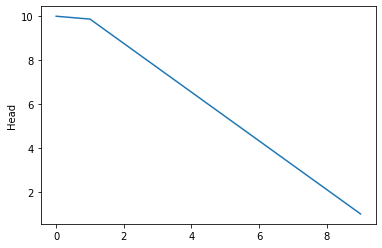

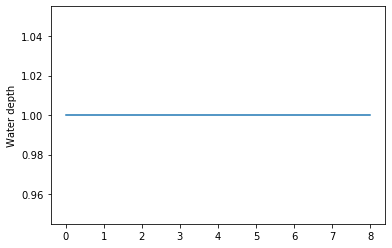

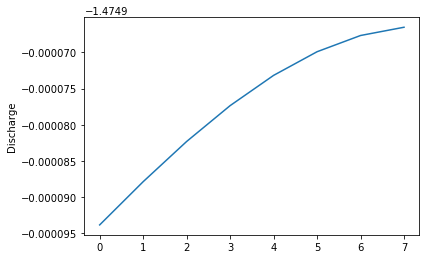

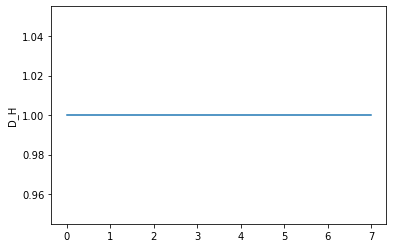

In [7]:
print("Node net fluxes = ",mg.calc_net_flux_at_node(Q)[mg.core_nodes]/mg.dx + mg.at_node['input__discharge'][mg.core_nodes])
print("Node head = ",h)

figure()
plot(h[10:20])
#plot(h[20:30])
#plot(h[30:40])
ylabel('Head')

print('Discharge=',Q[mg.active_links])
#Discharge from DW equation
L = max(mg.node_x)
deltaH = max(h[mg.nodes_at_left_edge]) - min(h[mg.nodes_at_right_edge])
f=0.1
g=9.8
D_H = 1. 
print('DW discharge = ', D_H**2.*sqrt(2*g*D_H*deltaH/f/L))

figure()
water_depth = mg.at_node['hydraulic__head'][11:20] - mg.at_node['junction__elevation'][11:20]
water_depth[water_depth>1.] = 1.
plot(water_depth)
ylabel('Water depth')


figure()
plot(Q[mg.active_links])
ylabel('Discharge')

figure()
plot(mg.at_link['hydraulic__diameter'][mg.active_links])
ylabel('D_H')




### Test Case 3 (Single conduit, Recharge boundary, slightly tilted domain)

In [18]:
### Note need to add downstream boundary condition for critical flow depth (free outfall)

#For rectangle, Y_crit = (Q^2/(g w^2))^(1/3)



mg = RasterModelGrid((3,10),100)
junc_elev = mg.add_zeros('node', 'junction__elevation')
R = mg.add_zeros('node', 'input__discharge')
h = mg.add_zeros('node', 'hydraulic__head')
Q = mg.add_zeros('link', 'conduit__discharge')
mg.add_zeros('node','storage')
mg.at_node['storage']=10.*np.ones(mg.number_of_nodes)

mg.at_node['junction__elevation'] = -0.0001*mg.node_x + 0.09
#mg.at_node['hydraulic__head'] = mg.at_node['junction__elevation'] + 1
#h = mg.at_node['hydraulic__head']


w = mg.add_zeros('link','width')
mg.at_link['width']= 1.0*np.ones(mg.number_of_links)#.*np.random.rand(mg.number_of_active_links)

d_h = mg.add_zeros('link','hydraulic__diameter')
mg.at_link['hydraulic__diameter'] = mg.at_link['width'].copy()

mg.at_node['input__discharge'][11]=0.05

#Set up link elevation offsets
xc_min_head = mg.add_zeros('link', 'conduit_head__offset')
xc_min_tail = mg.add_zeros('link', 'conduit_tail__offset')
y_max = mg.add_zeros('link', 'maximum__depth')
mg.at_link['maximum__depth']= mg.at_link['width']#applicable for square conduits

#print(mg.at_link['maximum__depth'])

#set heads at edges
h[mg.nodes_at_top_edge] = 0.
h[mg.nodes_at_bottom_edge] = 0.
h[mg.nodes_at_left_edge] = 10.
h[mg.nodes_at_right_edge] = 0.0


mg.set_closed_boundaries_at_grid_edges(False,True,True,True)
Q[mg.active_links] = 0.#0.1*np.random.rand(mg.number_of_active_links)
n_core = mg.number_of_core_nodes
links = mg.links_at_node
print("Number of links = ", mg.number_of_links)
print("Number of nodes = ", mg.number_of_nodes)
print("Number of active links = ", mg.number_of_active_links)
print("Number of core nodes = ", mg.number_of_core_nodes)

pfn = PresFlowNetwork(mg)

for i in arange(500):
    print('Time iteration:', i)
    pfn.dyn_wave_solution(dt=10., outflow_bnd_type='outfall')


Number of links =  47
Number of nodes =  30
Number of active links =  8
Number of core nodes =  8
Time iteration: 0
max change in h:  0.0124999969344
max change in h:  0.006249999997
max change in h:  0.00312500075943
max change in h:  0.00156250075236
max change in h:  0.000781250547912
max change in h:  0.000390625337293
max change in h:  0.000195312680311
max change in h:  9.76563403574e-05
average dh= 0.00625   average abs(dQ)= 7.75505687235e-11
Time iteration: 1
max change in h:  0.0124999998054
max change in h:  0.00621032675835
max change in h:  0.00307053250089
max change in h:  0.00150837404611
max change in h:  0.000737388407855
max change in h:  0.00035911204035
max change in h:  0.000174386569677
max change in h:  8.45062043765e-05
average dh= 0.00625   average abs(dQ)= 6.90603337372e-05
Time iteration: 2
max change in h:  0.0120929331906
max change in h:  0.00584354591622
max change in h:  0.00278803415747
max change in h:  0.00131544556182
max change in h:  0.000614821529

max change in h:  0.00833924535647
max change in h:  0.00421913602139
max change in h:  0.00210397330836
max change in h:  0.00103466825634
max change in h:  0.00050248666834
max change in h:  0.000241446386648
max change in h:  0.000115022133907
max change in h:  5.44394267281e-05
average dh= 0.00625   average abs(dQ)= 0.00124719082461
Time iteration: 26
max change in h:  0.00864432725277
max change in h:  0.00415785893334
max change in h:  0.0019526346963
max change in h:  0.00089865410025
max change in h:  0.000407097493974
max change in h:  0.000182437932728
max change in h:  8.1326693202e-05
average dh= 0.00625   average abs(dQ)= 0.00115943114002
Time iteration: 27
max change in h:  0.00793173731529
max change in h:  0.00364624706965
max change in h:  0.00162158930523
max change in h:  0.000701338672144
max change in h:  0.000320143411528
max change in h:  0.000177882974928
max change in h:  9.6657076099e-05
average dh= 0.00625   average abs(dQ)= 0.00104649509072
Time iteration: 2

max change in h:  0.000766550713529
max change in h:  0.00036057339013
max change in h:  0.000164676926923
max change in h:  7.33849502166e-05
average dh= 0.0016877997342   average abs(dQ)= 0.000350793833469
Time iteration: 52
max change in h:  0.000670205223989
max change in h:  0.000306880671142
max change in h:  0.000136882051188
max change in h:  6.38431675665e-05
average dh= 0.00159730127326   average abs(dQ)= 0.000338157495578
Time iteration: 53
max change in h:  0.000532869971575
max change in h:  0.000257465649885
max change in h:  0.000123149918954
max change in h:  5.79587739733e-05
average dh= 0.00151066605479   average abs(dQ)= 0.000327983465644
Time iteration: 54
max change in h:  0.000499062867854
max change in h:  0.000236707106293
max change in h:  0.000110151898549
max change in h:  5.05377212244e-05
average dh= 0.0014231988163   average abs(dQ)= 0.000317725914796
Time iteration: 55
max change in h:  0.00043769347424
max change in h:  0.000205021595477
max change in h:

max change in h:  1.45171708991e-05
average dh= 5.07209612873e-05   average abs(dQ)= 1.48154763113e-05
Time iteration: 118
max change in h:  1.37444849174e-05
average dh= 4.82053846886e-05   average abs(dQ)= 1.40844096456e-05
Time iteration: 119
max change in h:  1.29957279215e-05
average dh= 4.58138789412e-05   average abs(dQ)= 1.33907760181e-05
Time iteration: 120
max change in h:  1.2293014732e-05
average dh= 4.35367456721e-05   average abs(dQ)= 1.27310651615e-05
Time iteration: 121
max change in h:  1.16542738723e-05
average dh= 4.13667662893e-05   average abs(dQ)= 1.21024216439e-05
Time iteration: 122
max change in h:  1.10656426594e-05
average dh= 3.92991986076e-05   average abs(dQ)= 1.15028301072e-05
Time iteration: 123
max change in h:  1.05314897338e-05
average dh= 3.7331078903e-05   average abs(dQ)= 1.09310427217e-05
Time iteration: 124
max change in h:  1.00312237893e-05
average dh= 3.54601899154e-05   average abs(dQ)= 1.03863189073e-05
Time iteration: 125
max change in h:  

max change in h:  1.85882505832e-07
average dh= 6.58106333885e-07   average abs(dQ)= 1.93185793904e-07
Time iteration: 203
max change in h:  1.76559683873e-07
average dh= 6.2529962632e-07   average abs(dQ)= 1.83558261293e-07
Time iteration: 204
max change in h:  1.67756993241e-07
average dh= 5.94122280932e-07   average abs(dQ)= 1.74410140807e-07
Time iteration: 205
max change in h:  1.59441632008e-07
average dh= 5.64496197251e-07   average abs(dQ)= 1.65716617975e-07
Time iteration: 206
max change in h:  1.51565697992e-07
average dh= 5.36347814956e-07   average abs(dQ)= 1.57454839847e-07
Time iteration: 207
max change in h:  1.44077633157e-07
average dh= 5.09606461126e-07   average abs(dQ)= 1.49603906632e-07
Time iteration: 208
max change in h:  1.36934054984e-07
average dh= 4.84203240415e-07   average abs(dQ)= 1.42144442317e-07
Time iteration: 209
max change in h:  1.30107537855e-07
average dh= 4.60070730617e-07   average abs(dQ)= 1.35057954464e-07
Time iteration: 210
max change in h: 

max change in h:  2.4084928496e-09
average dh= 8.523503184e-09   average abs(dQ)= 2.50222001452e-09
Time iteration: 288
max change in h:  2.28855834283e-09
average dh= 8.09858634956e-09   average abs(dQ)= 2.37750398622e-09
Time iteration: 289
max change in h:  2.17460777163e-09
average dh= 7.69485630563e-09   average abs(dQ)= 2.25900226129e-09
Time iteration: 290
max change in h:  2.06629330313e-09
average dh= 7.31126077532e-09   average abs(dQ)= 2.14639667238e-09
Time iteration: 291
max change in h:  1.96330923741e-09
average dh= 6.94679627768e-09   average abs(dQ)= 2.03939126697e-09
Time iteration: 292
max change in h:  1.86539406144e-09
average dh= 6.60050617237e-09   average abs(dQ)= 1.93771158234e-09
Time iteration: 293
max change in h:  1.77232101217e-09
average dh= 6.27147988975e-09   average abs(dQ)= 1.84110055673e-09
Time iteration: 294
max change in h:  1.6838834771e-09
average dh= 5.95885253266e-09   average abs(dQ)= 1.74931316828e-09
Time iteration: 295
max change in h:  1.

max change in h:  3.63666319281e-11
average dh= 1.28695099594e-10   average abs(dQ)= 3.77808600377e-11
Time iteration: 370
max change in h:  3.4554414885e-11
average dh= 1.22279532801e-10   average abs(dQ)= 3.5897344125e-11
Time iteration: 371
max change in h:  3.2832903063e-11
average dh= 1.16183777408e-10   average abs(dQ)= 3.41078302754e-11
Time iteration: 372
max change in h:  3.11971559697e-11
average dh= 1.1039192534e-10   average abs(dQ)= 3.24076373376e-11
Time iteration: 373
max change in h:  2.96423441348e-11
average dh= 1.04888843375e-10   average abs(dQ)= 3.07922532958e-11
Time iteration: 374
max change in h:  2.81644152444e-11
average dh= 9.96601311719e-11   average abs(dQ)= 2.92573786378e-11
Time iteration: 375
max change in h:  2.67597055625e-11
average dh= 9.46920885973e-11   average abs(dQ)= 2.77989220185e-11
Time iteration: 376
max change in h:  2.54249954423e-11
average dh= 8.99716967075e-11   average abs(dQ)= 2.6413076587e-11
Time iteration: 377
max change in h:  2.4

max change in h:  5.21749310423e-13
average dh= 1.84627845998e-12   average abs(dQ)= 5.42016084792e-13
Time iteration: 453
max change in h:  4.95714580495e-13
average dh= 1.75424102328e-12   average abs(dQ)= 5.14994297207e-13
Time iteration: 454
max change in h:  4.71012118197e-13
average dh= 1.66679130567e-12   average abs(dQ)= 4.89318655039e-13
Time iteration: 455
max change in h:  4.47530901226e-13
average dh= 1.58370032366e-12   average abs(dQ)= 4.64921504073e-13
Time iteration: 456
max change in h:  4.25270929583e-13
average dh= 1.50475253785e-12   average abs(dQ)= 4.41742996349e-13
Time iteration: 457
max change in h:  4.04010158661e-13
average dh= 1.42974035389e-12   average abs(dQ)= 4.19728488077e-13
Time iteration: 458
max change in h:  3.83915121915e-13
average dh= 1.35846797353e-12   average abs(dQ)= 3.9880425351e-13
Time iteration: 459
max change in h:  3.64763774741e-13
average dh= 1.29074978136e-12   average abs(dQ)= 3.78926057198e-13
Time iteration: 460
max change in h: 

Node net fluxes =  [  1.22936383e-13   1.38227207e-13   1.52722279e-13   1.65751857e-13
   1.76854087e-13   1.84270377e-13   1.85655935e-13   1.74837922e-13]
Node head =  [ 10.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
  10.           0.39419266   0.37695369   0.3585211    0.33853012
   0.31641148   0.29119247   0.26095962   0.22084202   0.06340016
  10.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]
Discharge= [-0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05]
D_H= [ 0.76630509  0.75426259  0.73980123  0.72199704  0.69927493  0.66857689
  0.62240133  0.43043965]


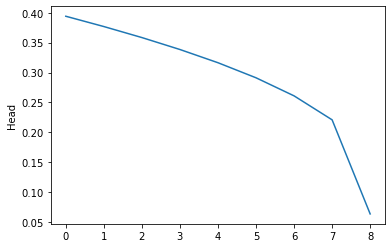

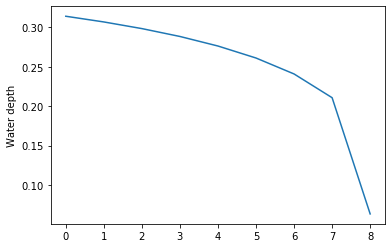

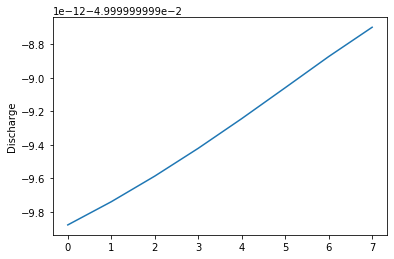

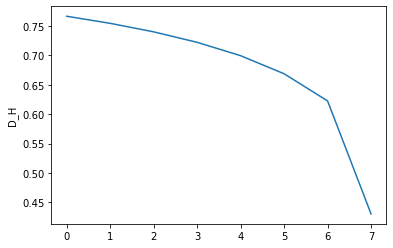

In [19]:
print("Node net fluxes = ",mg.calc_net_flux_at_node(Q)[mg.core_nodes]/mg.dx + mg.at_node['input__discharge'][mg.core_nodes])
print("Node head = ",mg.at_node['hydraulic__head'])

figure()
plot(mg.at_node['hydraulic__head'][11:20])
ylabel('Head')

figure()
water_depth = mg.at_node['hydraulic__head'][11:20] - mg.at_node['junction__elevation'][11:20]
water_depth[water_depth>1.] = 1.
plot(water_depth)
ylabel('Water depth')


figure()
plot(Q[mg.active_links])
ylabel('Discharge')

figure()
plot(mg.at_link['hydraulic__diameter'][mg.active_links])
ylabel('D_H')



print('Discharge=',Q[mg.active_links])
print('D_H=',mg.at_link['hydraulic__diameter'][mg.active_links])

Need to think about downstream bndy cond. It can produce some weird effects to have an artificially low fixed head boundary. 

For fully open channel solution iteration seems to get stuck with low dQ before head ever reaches appropriate range. 

### Test Case 4 (Single conduit, Recharge boundary, steeply tilted domain)

In [35]:
mg = RasterModelGrid((3,10),100)
junc_elev = mg.add_zeros('node', 'junction__elevation')
R = mg.add_zeros('node', 'input__discharge')
h = mg.add_zeros('node', 'hydraulic__head')
Q = mg.add_zeros('link', 'conduit__discharge')
mg.add_zeros('node','storage')
mg.at_node['storage']=10.*np.ones(mg.number_of_nodes)

mg.at_node['junction__elevation'] = -0.1*mg.node_x + 90.
mg.at_node['hydraulic__head'] = mg.at_node['junction__elevation'] + 2.1
#h = mg.at_node['hydraulic__head']


w = mg.add_zeros('link','width')
mg.at_link['width']= 1.0*np.ones(mg.number_of_links)#.*np.random.rand(mg.number_of_active_links)

d_h = mg.add_zeros('link','hydraulic__diameter')
mg.at_link['hydraulic__diameter'] = mg.at_link['width'].copy()

mg.at_node['input__discharge'][11]=1.

#Set up link elevation offsets
xc_min_head = mg.add_zeros('link', 'conduit_head__offset')
xc_min_tail = mg.add_zeros('link', 'conduit_tail__offset')
y_max = mg.add_zeros('link', 'maximum__depth')
mg.at_link['maximum__depth']= mg.at_link['width']#applicable for square conduits

#print(mg.at_link['maximum__depth'])

#set heads at edges
h[mg.nodes_at_top_edge] = 0.
h[mg.nodes_at_bottom_edge] = 0.
h[mg.nodes_at_left_edge] = 100.
h[mg.nodes_at_right_edge] = 0.0


mg.set_closed_boundaries_at_grid_edges(False,True,True,True)
Q[mg.active_links] = -.1#0.1*np.random.rand(mg.number_of_active_links)
n_core = mg.number_of_core_nodes
links = mg.links_at_node
print("Number of links = ", mg.number_of_links)
print("Number of nodes = ", mg.number_of_nodes)
print("Number of active links = ", mg.number_of_active_links)
print("Number of core nodes = ", mg.number_of_core_nodes)

pfn = PresFlowNetwork(mg,dt=1.)

for i in arange(2500):
    print('Time iteration:', i)
    pfn.dyn_wave_solution(dt_min=0.01, dt_max=0.01, outflow_bnd_type='head', Cr=0.5)


Number of links =  47
Number of nodes =  30
Number of active links =  8
Number of core nodes =  8
Time iteration: 0
dt= 0.01    dt_h= 5.45319849796   dt_Cr= 12.3043556228
average dh= 0.00574451688149   average abs(dQ)= 0.933550667859
num iters= 4
Time iteration: 1
average dh= 1.95333003187e-06   average abs(dQ)= 0.0093272483711
num iters= 2
Time iteration: 2
average dh= 1.07963929249e-06   average abs(dQ)= 0.00932031556142
num iters= 2
Time iteration: 3
average dh= 2.06599509871e-07   average abs(dQ)= 0.00931333847577
num iters= 2
Time iteration: 4
average dh= -6.65785235203e-07   average abs(dQ)= 0.00930631725762
num iters= 2
Time iteration: 5
average dh= -1.53751087533e-06   average abs(dQ)= 0.00929925205121
num iters= 2
Time iteration: 6
average dh= -2.40857335653e-06   average abs(dQ)= 0.00929214300148
num iters= 2
Time iteration: 7
average dh= -3.27896863832e-06   average abs(dQ)= 0.00928499025412
num iters= 2
Time iteration: 8
average dh= -4.14869269381e-06   average abs(dQ)= 0.0

average dh= -8.31709857359e-05   average abs(dQ)= 0.00841927164019
num iters= 2
Time iteration: 104
average dh= -8.39597903578e-05   average abs(dQ)= 0.00840866105582
num iters= 2
Time iteration: 105
average dh= -8.47476056634e-05   average abs(dQ)= 0.00839802352231
num iters= 2
Time iteration: 106
average dh= -8.55344291795e-05   average abs(dQ)= 0.00838735922508
num iters= 2
Time iteration: 107
average dh= -8.63202584504e-05   average abs(dQ)= 0.0083766683496
num iters= 2
Time iteration: 108
average dh= -8.71050910374e-05   average abs(dQ)= 0.00836595108145
num iters= 2
Time iteration: 109
average dh= -8.7888924519e-05   average abs(dQ)= 0.00835520760627
num iters= 2
Time iteration: 110
dt= 0.01    dt_h= 466.308907034   dt_Cr= 10.3128537178
average dh= -8.8671756491e-05   average abs(dQ)= 0.00834443810976
num iters= 2
Time iteration: 111
average dh= -8.94535845661e-05   average abs(dQ)= 0.00833364277765
num iters= 2
Time iteration: 112
average dh= -9.02344063745e-05   average abs(dQ)

average dh= -0.000162232441181   average abs(dQ)= 0.00715526392601
num iters= 2
Time iteration: 212
average dh= -0.000162903591879   average abs(dQ)= 0.00714280045921
num iters= 2
Time iteration: 213
average dh= -0.000163573583947   average abs(dQ)= 0.00713032941471
num iters= 2
Time iteration: 214
average dh= -0.000164242416704   average abs(dQ)= 0.00711785095641
num iters= 2
Time iteration: 215
average dh= -0.000164910089482   average abs(dQ)= 0.00710536524776
num iters= 2
Time iteration: 216
average dh= -0.000165576601627   average abs(dQ)= 0.0070928724518
num iters= 2
Time iteration: 217
average dh= -0.000166241952502   average abs(dQ)= 0.00708037273114
num iters= 2
Time iteration: 218
average dh= -0.000166906141483   average abs(dQ)= 0.00706786624792
num iters= 2
Time iteration: 219
average dh= -0.000167569167964   average abs(dQ)= 0.00705535316389
num iters= 2
Time iteration: 220
dt= 0.01    dt_h= 247.153283303   dt_Cr= 9.12084721905
average dh= -0.000168231031351   average abs(d

average dh= -0.000230131629921   average abs(dQ)= 0.00574661717254
num iters= 2
Time iteration: 324
average dh= -0.000230671937777   average abs(dQ)= 0.00573421157428
num iters= 2
Time iteration: 325
average dh= -0.000231211094104   average abs(dQ)= 0.00572181359585
num iters= 2
Time iteration: 326
average dh= -0.000231749099621   average abs(dQ)= 0.00570942334134
num iters= 2
Time iteration: 327
average dh= -0.000232285955057   average abs(dQ)= 0.0056970409143
num iters= 2
Time iteration: 328
average dh= -0.000232821661148   average abs(dQ)= 0.00568466641767
num iters= 2
Time iteration: 329
average dh= -0.00023335621864   average abs(dQ)= 0.00567229995382
num iters= 2
Time iteration: 330
dt= 0.01    dt_h= 178.867809685   dt_Cr= 8.3277068636
average dh= -0.000233889628291   average abs(dQ)= 0.00565994162454
num iters= 2
Time iteration: 331
average dh= -0.000234421890865   average abs(dQ)= 0.00564759153104
num iters= 2
Time iteration: 332
average dh= -0.000234953007137   average abs(dQ)

average dh= -0.000282865947225   average abs(dQ)= 0.00444685236039
num iters= 2
Time iteration: 434
average dh= -0.000283285657274   average abs(dQ)= 0.00443578666016
num iters= 2
Time iteration: 435
average dh= -0.000283704340979   average abs(dQ)= 0.00442473667902
num iters= 2
Time iteration: 436
average dh= -0.000284121999805   average abs(dQ)= 0.00441370246163
num iters= 2
Time iteration: 437
average dh= -0.000284538635218   average abs(dQ)= 0.00440268405216
num iters= 2
Time iteration: 438
average dh= -0.000284954248691   average abs(dQ)= 0.00439168149432
num iters= 2
Time iteration: 439
average dh= -0.000285368841699   average abs(dQ)= 0.00438069483135
num iters= 2
Time iteration: 440
dt= 0.01    dt_h= 147.504295273   dt_Cr= 7.78934767055
average dh= -0.000285782415723   average abs(dQ)= 0.00436972410603
num iters= 2
Time iteration: 441
average dh= -0.000286194972244   average abs(dQ)= 0.00435876936065
num iters= 2
Time iteration: 442
average dh= -0.000286606512752   average abs(

average dh= -0.000322580644355   average abs(dQ)= 0.00334935216191
num iters= 2
Time iteration: 542
average dh= -0.000322898587227   average abs(dQ)= 0.00334015467254
num iters= 2
Time iteration: 543
average dh= -0.000323215677463   average abs(dQ)= 0.0033309753398
num iters= 2
Time iteration: 544
average dh= -0.000323531916752   average abs(dQ)= 0.00332181416715
num iters= 2
Time iteration: 545
average dh= -0.000323847306781   average abs(dQ)= 0.00331267115776
num iters= 2
Time iteration: 546
average dh= -0.000324161849235   average abs(dQ)= 0.00330354631452
num iters= 2
Time iteration: 547
average dh= -0.000324475545804   average abs(dQ)= 0.00329443964003
num iters= 2
Time iteration: 548
average dh= -0.000324788398175   average abs(dQ)= 0.0032853511366
num iters= 2
Time iteration: 549
average dh= -0.000325100408036   average abs(dQ)= 0.00327628080627
num iters= 2
Time iteration: 550
dt= 0.01    dt_h= 130.714203435   dt_Cr= 7.42301934624
average dh= -0.000325411577075   average abs(dQ

average dh= -0.000352805676101   average abs(dQ)= 0.00244576120808
num iters= 2
Time iteration: 652
average dh= -0.000353039871775   average abs(dQ)= 0.00243852885587
num iters= 2
Time iteration: 653
average dh= -0.000353273397301   average abs(dQ)= 0.00243131365711
num iters= 2
Time iteration: 654
average dh= -0.000353506254273   average abs(dQ)= 0.00242411559284
num iters= 2
Time iteration: 655
average dh= -0.000353738444279   average abs(dQ)= 0.00241693464397
num iters= 2
Time iteration: 656
average dh= -0.00035396996891   average abs(dQ)= 0.00240977079129
num iters= 2
Time iteration: 657
average dh= -0.000354200829752   average abs(dQ)= 0.00240262401546
num iters= 2
Time iteration: 658
average dh= -0.000354431028391   average abs(dQ)= 0.00239549429703
num iters= 2
Time iteration: 659
average dh= -0.000354660566411   average abs(dQ)= 0.0023883816164
num iters= 2
Time iteration: 660
dt= 0.01    dt_h= 121.098905035   dt_Cr= 7.17203999476
average dh= -0.000354889445392   average abs(dQ

average dh= -0.000374881928895   average abs(dQ)= 0.00174834309997
num iters= 2
Time iteration: 762
average dh= -0.000375051518287   average abs(dQ)= 0.00174286264728
num iters= 2
Time iteration: 763
average dh= -0.000375220600145   average abs(dQ)= 0.00173739672408
num iters= 2
Time iteration: 764
average dh= -0.000375389175819   average abs(dQ)= 0.00173194530338
num iters= 2
Time iteration: 765
average dh= -0.000375557246653   average abs(dQ)= 0.00172650835818
num iters= 2
Time iteration: 766
average dh= -0.000375724813992   average abs(dQ)= 0.00172108586145
num iters= 2
Time iteration: 767
average dh= -0.000375891879176   average abs(dQ)= 0.00171567778613
num iters= 2
Time iteration: 768
average dh= -0.000376058443544   average abs(dQ)= 0.00171028410515
num iters= 2
Time iteration: 769
average dh= -0.000376224508431   average abs(dQ)= 0.00170490479139
num iters= 2
Time iteration: 770
dt= 0.01    dt_h= 115.498010361   dt_Cr= 6.99943384837
average dh= -0.000376390075172   average abs(

average dh= -0.000390158336778   average abs(dQ)= 0.00132041906175
num iters= 2
Time iteration: 867
average dh= -0.000390281521394   average abs(dQ)= 0.00131361116905
num iters= 2
Time iteration: 868
average dh= -0.000390404326171   average abs(dQ)= 0.00130681547883
num iters= 2
Time iteration: 869
average dh= -0.00039052675219   average abs(dQ)= 0.00130003199722
num iters= 2
Time iteration: 870
dt= 0.01    dt_h= 110.348529011   dt_Cr= 6.79902615344
average dh= -0.000390648800529   average abs(dQ)= 0.00129326073032
num iters= 2
Time iteration: 871
average dh= -0.000390770472265   average abs(dQ)= 0.00128650168426
num iters= 2
Time iteration: 872
average dh= -0.000390891768472   average abs(dQ)= 0.00127975486516
num iters= 2
Time iteration: 873
average dh= -0.00039101269022   average abs(dQ)= 0.00127302027912
num iters= 2
Time iteration: 874
average dh= -0.00039113323858   average abs(dQ)= 0.00126629793225
num iters= 2
Time iteration: 875
average dh= -0.000391253414617   average abs(dQ)

average dh= -0.000401563091767   average abs(dQ)= 0.000981275081347
num iters= 2
Time iteration: 976
average dh= -0.000401650727027   average abs(dQ)= 0.000981537968422
num iters= 2
Time iteration: 977
average dh= -0.000401738086125   average abs(dQ)= 0.000981803172356
num iters= 2
Time iteration: 978
average dh= -0.000401825169887   average abs(dQ)= 0.00098207064529
num iters= 2
Time iteration: 979
average dh= -0.000401911979135   average abs(dQ)= 0.000982340339461
num iters= 2
Time iteration: 980
dt= 0.01    dt_h= 110.672069553   dt_Cr= 6.40284259656
average dh= -0.000401998514691   average abs(dQ)= 0.000982612207208
num iters= 2
Time iteration: 981
average dh= -0.000402084777371   average abs(dQ)= 0.000982886200967
num iters= 2
Time iteration: 982
average dh= -0.000402170767992   average abs(dQ)= 0.000983162273276
num iters= 2
Time iteration: 983
average dh= -0.000402256487369   average abs(dQ)= 0.000983440376772
num iters= 2
Time iteration: 984
average dh= -0.000402341936312   aver

average dh= -0.000409338615257   average abs(dQ)= 0.00101280133019
num iters= 2
Time iteration: 1080
dt= 0.01    dt_h= 117.950080194   dt_Cr= 6.14558612723
average dh= -0.000409401570039   average abs(dQ)= 0.00101306874863
num iters= 2
Time iteration: 1081
average dh= -0.000409464323527   average abs(dQ)= 0.00101333411285
num iters= 2
Time iteration: 1082
average dh= -0.00040952687634   average abs(dQ)= 0.00101359738758
num iters= 2
Time iteration: 1083
average dh= -0.000409589229098   average abs(dQ)= 0.00101385853769
num iters= 2
Time iteration: 1084
average dh= -0.000409651382418   average abs(dQ)= 0.0010141175282
num iters= 2
Time iteration: 1085
average dh= -0.000409713336913   average abs(dQ)= 0.00101437432428
num iters= 2
Time iteration: 1086
average dh= -0.000409775093197   average abs(dQ)= 0.00101462889123
num iters= 2
Time iteration: 1087
average dh= -0.000409836651881   average abs(dQ)= 0.00101488119452
num iters= 2
Time iteration: 1088
average dh= -0.000409898013576   avera

average dh= -0.000415181057457   average abs(dQ)= 0.00102318780603
num iters= 2
Time iteration: 1190
dt= 0.01    dt_h= 134.73327764   dt_Cr= 5.98234553826
average dh= -0.000415225230943   average abs(dQ)= 0.0010230519506
num iters= 2
Time iteration: 1191
average dh= -0.000415269261653   average abs(dQ)= 0.00102291113601
num iters= 2
Time iteration: 1192
average dh= -0.000415313150039   average abs(dQ)= 0.00102276534581
num iters= 2
Time iteration: 1193
average dh= -0.000415356896548   average abs(dQ)= 0.00102261456377
num iters= 2
Time iteration: 1194
average dh= -0.000415400501628   average abs(dQ)= 0.00102245877383
num iters= 2
Time iteration: 1195
average dh= -0.000415443965725   average abs(dQ)= 0.00102229796016
num iters= 2
Time iteration: 1196
average dh= -0.000415487289283   average abs(dQ)= 0.00102213210708
num iters= 2
Time iteration: 1197
average dh= -0.000415530472745   average abs(dQ)= 0.00102196119914
num iters= 2
Time iteration: 1198
average dh= -0.000415573516555   avera

average dh= -0.000419211880015   average abs(dQ)= 0.000938010750289
num iters= 2
Time iteration: 1298
average dh= -0.000419242977526   average abs(dQ)= 0.000934019969487
num iters= 2
Time iteration: 1299
average dh= -0.000419273973781   average abs(dQ)= 0.00093004908721
num iters= 2
Time iteration: 1300
dt= 0.01    dt_h= 163.876810174   dt_Cr= 6.03822699775
average dh= -0.000419304869104   average abs(dQ)= 0.000926097968697
num iters= 2
Time iteration: 1301
average dh= -0.000419335663818   average abs(dQ)= 0.000922166480392
num iters= 2
Time iteration: 1302
average dh= -0.000419366358245   average abs(dQ)= 0.000918254489934
num iters= 2
Time iteration: 1303
average dh= -0.000419396952706   average abs(dQ)= 0.000914361866144
num iters= 2
Time iteration: 1304
average dh= -0.000419427447521   average abs(dQ)= 0.000910488479009
num iters= 2
Time iteration: 1305
average dh= -0.000419457843009   average abs(dQ)= 0.000906634199673
num iters= 2
Time iteration: 1306
average dh= -0.0004194881394

average dh= -0.000421913865216   average abs(dQ)= 0.000614520797216
num iters= 2
Time iteration: 1400
dt= 0.01    dt_h= 194.293365512   dt_Cr= 6.54074702743
average dh= -0.000421936143392   average abs(dQ)= 0.000612027625454
num iters= 2
Time iteration: 1401
average dh= -0.000421958348672   average abs(dQ)= 0.00060954509905
num iters= 2
Time iteration: 1402
average dh= -0.00042198048129   average abs(dQ)= 0.000607073159136
num iters= 2
Time iteration: 1403
average dh= -0.000422002541482   average abs(dQ)= 0.000604611747275
num iters= 2
Time iteration: 1404
average dh= -0.000422024529481   average abs(dQ)= 0.000602160805453
num iters= 2
Time iteration: 1405
average dh= -0.000422046445521   average abs(dQ)= 0.000599720276079
num iters= 2
Time iteration: 1406
average dh= -0.000422068289835   average abs(dQ)= 0.000597290101978
num iters= 2
Time iteration: 1407
average dh= -0.000422090062655   average abs(dQ)= 0.00059487022639
num iters= 2
Time iteration: 1408
average dh= -0.000422111764211

dt= 0.01    dt_h= 182.605389502   dt_Cr= 6.64763730946
average dh= -0.000423669402788   average abs(dQ)= 0.000438447804604
num iters= 2
Time iteration: 1491
average dh= -0.000423685927582   average abs(dQ)= 0.000437009579134
num iters= 2
Time iteration: 1492
average dh= -0.000423702398133   average abs(dQ)= 0.00043557738315
num iters= 2
Time iteration: 1493
average dh= -0.000423718814617   average abs(dQ)= 0.000434151185395
num iters= 2
Time iteration: 1494
average dh= -0.00042373517721   average abs(dQ)= 0.000432730954817
num iters= 2
Time iteration: 1495
average dh= -0.000423751486087   average abs(dQ)= 0.00043131666056
num iters= 2
Time iteration: 1496
average dh= -0.000423767741424   average abs(dQ)= 0.000429908271971
num iters= 2
Time iteration: 1497
average dh= -0.000423783943393   average abs(dQ)= 0.000428505758591
num iters= 2
Time iteration: 1498
average dh= -0.000423800092169   average abs(dQ)= 0.000427109090158
num iters= 2
Time iteration: 1499
average dh= -0.000423816187925

average dh= -0.000425091712731   average abs(dQ)= 0.000319141466447
num iters= 2
Time iteration: 1592
average dh= -0.000425103562781   average abs(dQ)= 0.000318182510356
num iters= 2
Time iteration: 1593
average dh= -0.000425115373833   average abs(dQ)= 0.0003172272307
num iters= 2
Time iteration: 1594
average dh= -0.000425127146013   average abs(dQ)= 0.000316275610512
num iters= 2
Time iteration: 1595
average dh= -0.00042513887945   average abs(dQ)= 0.000315327632918
num iters= 2
Time iteration: 1596
average dh= -0.00042515057427   average abs(dQ)= 0.000314383281143
num iters= 2
Time iteration: 1597
average dh= -0.000425162230599   average abs(dQ)= 0.000313442538503
num iters= 2
Time iteration: 1598
average dh= -0.000425173848563   average abs(dQ)= 0.00031250538841
num iters= 2
Time iteration: 1599
average dh= -0.000425185428288   average abs(dQ)= 0.000311571814366
num iters= 2
Time iteration: 1600
dt= 0.01    dt_h= 168.481190974   dt_Cr= 6.63685997956
average dh= -0.000425196969898  

dt= 0.01    dt_h= 162.0904983   dt_Cr= 6.63054591921
average dh= -0.000426094225965   average abs(dQ)= 0.000239696180845
num iters= 2
Time iteration: 1691
average dh= -0.000426102773799   average abs(dQ)= 0.000239031742432
num iters= 2
Time iteration: 1692
average dh= -0.000426111293451   average abs(dQ)= 0.000238369678629
num iters= 2
Time iteration: 1693
average dh= -0.000426119785014   average abs(dQ)= 0.000237709979433
num iters= 2
Time iteration: 1694
average dh= -0.00042612824858   average abs(dQ)= 0.000237052634892
num iters= 2
Time iteration: 1695
average dh= -0.000426136684241   average abs(dQ)= 0.000236397635104
num iters= 2
Time iteration: 1696
average dh= -0.000426145092088   average abs(dQ)= 0.000235744970216
num iters= 2
Time iteration: 1697
average dh= -0.000426153472213   average abs(dQ)= 0.000235094630425
num iters= 2
Time iteration: 1698
average dh= -0.000426161824706   average abs(dQ)= 0.000234446605976
num iters= 2
Time iteration: 1699
average dh= -0.000426170149659

average dh= -0.00042681719122   average abs(dQ)= 0.000184036980289
num iters= 2
Time iteration: 1790
dt= 0.01    dt_h= 158.09289136   dt_Cr= 6.62542383466
average dh= -0.000426823353942   average abs(dQ)= 0.000183565990786
num iters= 2
Time iteration: 1791
average dh= -0.000426829496319   average abs(dQ)= 0.000183096589073
num iters= 2
Time iteration: 1792
average dh= -0.000426835618419   average abs(dQ)= 0.000182628768937
num iters= 2
Time iteration: 1793
average dh= -0.000426841720307   average abs(dQ)= 0.000182162524192
num iters= 2
Time iteration: 1794
average dh= -0.000426847802052   average abs(dQ)= 0.000181697848682
num iters= 2
Time iteration: 1795
average dh= -0.000426853863718   average abs(dQ)= 0.000181234736278
num iters= 2
Time iteration: 1796
average dh= -0.000426859905372   average abs(dQ)= 0.000180773180878
num iters= 2
Time iteration: 1797
average dh= -0.00042686592708   average abs(dQ)= 0.00018031317641
num iters= 2
Time iteration: 1798
average dh= -0.000426871928907 

average dh= -0.000427311372685   average abs(dQ)= 0.00014629685148
num iters= 2
Time iteration: 1883
average dh= -0.00042731590328   average abs(dQ)= 0.000145950228094
num iters= 2
Time iteration: 1884
average dh= -0.000427320418905   average abs(dQ)= 0.000145604718722
num iters= 2
Time iteration: 1885
average dh= -0.000427324919609   average abs(dQ)= 0.000145260319242
num iters= 2
Time iteration: 1886
average dh= -0.000427329405442   average abs(dQ)= 0.00014491702555
num iters= 2
Time iteration: 1887
average dh= -0.000427333876452   average abs(dQ)= 0.000144574833559
num iters= 2
Time iteration: 1888
average dh= -0.00042733833269   average abs(dQ)= 0.000144233739199
num iters= 2
Time iteration: 1889
average dh= -0.000427342774202   average abs(dQ)= 0.000143893738419
num iters= 2
Time iteration: 1890
dt= 0.01    dt_h= 156.185713155   dt_Cr= 6.621748722
average dh= -0.000427347201038   average abs(dQ)= 0.000143554827183
num iters= 2
Time iteration: 1891
average dh= -0.000427351613247   

average dh= -0.000427687887176   average abs(dQ)= 0.000294777228468
num iters= 2
Time iteration: 1980
dt= 0.01    dt_h= 149.638680552   dt_Cr= 6.5934701541
average dh= -0.000427691173286   average abs(dQ)= 0.000294199672458
num iters= 2
Time iteration: 1981
average dh= -0.000427694448531   average abs(dQ)= 0.000293624879464
num iters= 2
Time iteration: 1982
average dh= -0.000427697712946   average abs(dQ)= 0.000293052855055
num iters= 2
Time iteration: 1983
average dh= -0.000427700966568   average abs(dQ)= 0.00029248360481
num iters= 2
Time iteration: 1984
average dh= -0.000427704209432   average abs(dQ)= 0.000291917134317
num iters= 2
Time iteration: 1985
average dh= -0.000427707441573   average abs(dQ)= 0.000291353449176
num iters= 2
Time iteration: 1986
average dh= -0.000427710663027   average abs(dQ)= 0.000290792554998
num iters= 2
Time iteration: 1987
average dh= -0.00042771387383   average abs(dQ)= 0.000290234457407
num iters= 2
Time iteration: 1988
average dh= -0.000427717074015

average dh= -0.000427953757109   average abs(dQ)= 0.000474210035893
num iters= 2
Time iteration: 2074
average dh= -0.000427956163938   average abs(dQ)= 0.000478421914111
num iters= 2
Time iteration: 2075
average dh= -0.000427958562804   average abs(dQ)= 0.000482632090457
num iters= 2
Time iteration: 2076
average dh= -0.000427960953735   average abs(dQ)= 0.000486840567489
num iters= 2
Time iteration: 2077
average dh= -0.000427963336757   average abs(dQ)= 0.000491047347983
num iters= 2
Time iteration: 2078
average dh= -0.000427965711896   average abs(dQ)= 0.000495252434937
num iters= 2
Time iteration: 2079
average dh= -0.000427968079177   average abs(dQ)= 0.00049945583157
num iters= 2
Time iteration: 2080
dt= 0.01    dt_h= 140.187876923   dt_Cr= 6.34265309945
average dh= -0.000427970438628   average abs(dQ)= 0.000503657541324
num iters= 2
Time iteration: 2081
average dh= -0.000427972790273   average abs(dQ)= 0.000507857567869
num iters= 2
Time iteration: 2082
average dh= -0.0004279751341

average dh= -0.000428148474485   average abs(dQ)= 0.000864553411863
num iters= 2
Time iteration: 2168
average dh= -0.00042815023708   average abs(dQ)= 0.000868687469045
num iters= 2
Time iteration: 2169
average dh= -0.000428151993842   average abs(dQ)= 0.000872821537841
num iters= 2
Time iteration: 2170
dt= 0.01    dt_h= 133.215429472   dt_Cr= 6.16755208366
average dh= -0.000428153744791   average abs(dQ)= 0.000876955653835
num iters= 2
Time iteration: 2171
average dh= -0.000428155489945   average abs(dQ)= 0.000881089853139
num iters= 2
Time iteration: 2172
average dh= -0.000428157229325   average abs(dQ)= 0.000885224172395
num iters= 2
Time iteration: 2173
average dh= -0.000428158962948   average abs(dQ)= 0.000889358648786
num iters= 2
Time iteration: 2174
average dh= -0.000428160690835   average abs(dQ)= 0.00089349332004
num iters= 2
Time iteration: 2175
average dh= -0.000428162413003   average abs(dQ)= 0.000897628224437
num iters= 2
Time iteration: 2176
average dh= -0.00042816412947

average dh= -0.000428291065418   average abs(dQ)= 0.00126009367738
num iters= 2
Time iteration: 2262
average dh= -0.000428292356099   average abs(dQ)= 0.00126448584505
num iters= 2
Time iteration: 2263
average dh= -0.000428293642508   average abs(dQ)= 0.00126888521034
num iters= 2
Time iteration: 2264
average dh= -0.00042829492466   average abs(dQ)= 0.0012732919204
num iters= 2
Time iteration: 2265
average dh= -0.000428296202567   average abs(dQ)= 0.00127770612488
num iters= 2
Time iteration: 2266
average dh= -0.000428297476244   average abs(dQ)= 0.00128212797603
num iters= 2
Time iteration: 2267
average dh= -0.000428298745706   average abs(dQ)= 0.00128655762875
num iters= 2
Time iteration: 2268
average dh= -0.000428300010966   average abs(dQ)= 0.00129099524065
num iters= 2
Time iteration: 2269
average dh= -0.000428301272037   average abs(dQ)= 0.00129544097209
num iters= 2
Time iteration: 2270
dt= 0.01    dt_h= 125.710289755   dt_Cr= 6.01191830354
average dh= -0.000428302528935   avera

average dh= -0.000428393576284   average abs(dQ)= 0.00172436369453
num iters= 2
Time iteration: 2354
average dh= -0.000428394527624   average abs(dQ)= 0.00173064543921
num iters= 2
Time iteration: 2355
average dh= -0.000428395475816   average abs(dQ)= 0.00173697487185
num iters= 2
Time iteration: 2356
average dh= -0.000428396420868   average abs(dQ)= 0.00174335316116
num iters= 2
Time iteration: 2357
average dh= -0.000428397362791   average abs(dQ)= 0.00174978151307
num iters= 2
Time iteration: 2358
average dh= -0.000428398301597   average abs(dQ)= 0.00175626117227
num iters= 2
Time iteration: 2359
average dh= -0.000428399237294   average abs(dQ)= 0.00176279342387
num iters= 2
Time iteration: 2360
dt= 0.01    dt_h= 117.547228596   dt_Cr= 5.53500424254
average dh= -0.000428400169893   average abs(dQ)= 0.00176937959513
num iters= 2
Time iteration: 2361
average dh= -0.000428401099405   average abs(dQ)= 0.00177602105725
num iters= 2
Time iteration: 2362
average dh= -0.00042840202584   aver

average dh= -0.000428468036537   average abs(dQ)= 0.00308991317057
num iters= 4
Time iteration: 2436
average dh= -0.000428468916781   average abs(dQ)= 0.00317422206197
num iters= 4
Time iteration: 2437
average dh= -0.000428469793384   average abs(dQ)= 0.00327955374146
num iters= 4
Time iteration: 2438
average dh= -0.000428470666362   average abs(dQ)= 0.00342163232028
num iters= 4
Time iteration: 2439
average dh= -0.000428471535731   average abs(dQ)= 0.0028599888431
num iters= 4
Time iteration: 2440
dt= 0.01    dt_h= 82.3057511117   dt_Cr= 5.75332113538
average dh= -0.000428472401504   average abs(dQ)= 0.00102502857402
num iters= 4
Time iteration: 2441
average dh= -0.000428473263698   average abs(dQ)= 0.000853915542958
num iters= 4
Time iteration: 2442
average dh= -0.000428474122326   average abs(dQ)= 0.000829121064336
num iters= 4
Time iteration: 2443
average dh= -0.000428474977404   average abs(dQ)= 0.000819766431841
num iters= 4
Time iteration: 2444
average dh= -0.000428475828945   a

Seems to be trouble with stability of steep runs, perhaps particularly with outfall boundary.

Node net fluxes =  [  9.99991440e-01  -2.93255562e+00  -1.47078418e+00  -2.42445531e-02
  -5.39470588e-04  -1.11345446e-05  -1.67911805e-07  -1.86200396e-09]
Node head =  [ 92.1         82.1         72.1         62.1         52.1
  42.1         32.1         22.1         12.1          2.1
  92.1         79.18331311  69.82598317  61.83782829  52.09490664
  42.09988775  32.09999811  22.09999998  12.1          2.1
  92.1         82.1         72.1         62.1         52.1
  42.1         32.1         22.1         12.1          2.1       ]
Discharge= [ -8.56040241e-06  -2.93256418e+00  -4.40334836e+00  -4.42759292e+00
  -4.42813239e+00  -4.42814352e+00  -4.42814369e+00  -4.42814369e+00]
D_H= [  3.99920016e-04   1.00005000e+00   1.00000000e+00   1.00000000e+00
   1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00]


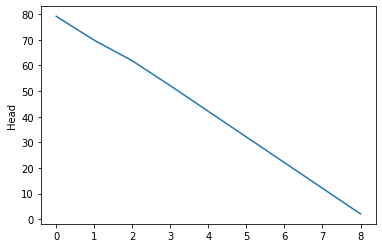

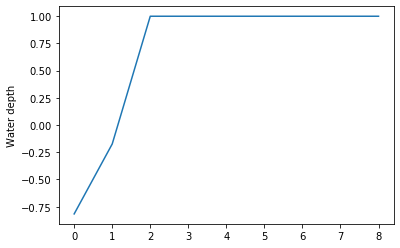

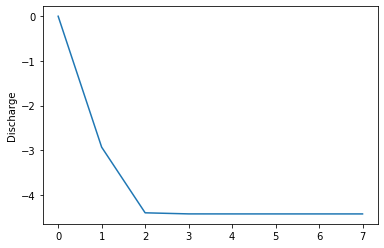

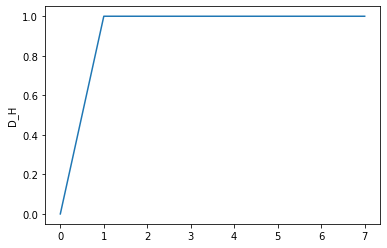

In [36]:
print("Node net fluxes = ",mg.calc_net_flux_at_node(Q)[mg.core_nodes]/mg.dx + mg.at_node['input__discharge'][mg.core_nodes])
print("Node head = ",mg.at_node['hydraulic__head'])

figure()
plot(mg.at_node['hydraulic__head'][11:20])
ylabel('Head')

figure()
water_depth = mg.at_node['hydraulic__head'][11:20] - mg.at_node['junction__elevation'][11:20]
water_depth[water_depth>1.] = 1.
plot(water_depth)
ylabel('Water depth')

figure()
plot(Q[mg.active_links])
ylabel('Discharge')

figure()
plot(mg.at_link['hydraulic__diameter'][mg.active_links])
ylabel('D_H')

print('Discharge=',Q[mg.active_links])
print('D_H=',mg.at_link['hydraulic__diameter'][mg.active_links])

### Test Case 5 (single conduit, steep, head boundary)

In [53]:
mg = RasterModelGrid((3,10),100)
junc_elev = mg.add_zeros('node', 'junction__elevation')
R = mg.add_zeros('node', 'input__discharge')
h = mg.add_zeros('node', 'hydraulic__head')
Q = mg.add_zeros('link', 'conduit__discharge')
mg.add_zeros('node','storage')
mg.at_node['storage']=1000.*np.ones(mg.number_of_nodes)

mg.at_node['junction__elevation'] = -0.1*mg.node_x + 90.
mg.at_node['hydraulic__head'] = mg.at_node['junction__elevation'] + 1.5
#h = mg.at_node['hydraulic__head']

w = mg.add_zeros('link','width')
mg.at_link['width']= 1.0*np.ones(mg.number_of_links)#.*np.random.rand(mg.number_of_active_links)

d_h = mg.add_zeros('link','hydraulic__diameter')
mg.at_link['hydraulic__diameter'] = mg.at_link['width'].copy()

#mg.at_node['input__discharge'][11]=1.

#Set up link elevation offsets
xc_min_head = mg.add_zeros('link', 'conduit_head__offset')
xc_min_tail = mg.add_zeros('link', 'conduit_tail__offset')
y_max = mg.add_zeros('link', 'maximum__depth')
mg.at_link['maximum__depth']= mg.at_link['width']#applicable for square conduits

#print(mg.at_link['maximum__depth'])

#set heads at edges
h[mg.nodes_at_top_edge] = 0.
h[mg.nodes_at_bottom_edge] = 0.
mg.at_node['hydraulic__head'][mg.nodes_at_left_edge] = mg.at_node['junction__elevation'][mg.nodes_at_left_edge] + 0.5 #100.
mg.at_node['hydraulic__head'][mg.nodes_at_right_edge] = mg.at_node['junction__elevation'][mg.nodes_at_right_edge] + 0.5


mg.set_closed_boundaries_at_grid_edges(False,True,False,True)
Q[mg.active_links] = 0.#0.1*np.random.rand(mg.number_of_active_links)
n_core = mg.number_of_core_nodes
links = mg.links_at_node
print("Number of links = ", mg.number_of_links)
print("Number of nodes = ", mg.number_of_nodes)
print("Number of active links = ", mg.number_of_active_links)
print("Number of core nodes = ", mg.number_of_core_nodes)

pfn = PresFlowNetwork(mg,dt=1.)

for i in arange(2500):
    print('Time iteration:', i)
    pfn.dyn_wave_solution(dt_min=0.01, dt_max=1.01, outflow_bnd_type='head', Cr=0.5)


Number of links =  47
Number of nodes =  30
Number of active links =  9
Number of core nodes =  8
Time iteration: 0
dt= 1.01    dt_h= 3194.27536296   dt_Cr= 13.8022721447
average dh= -6.71528018956e-06   average abs(dQ)= 0.90492915023
num iters= 2
Time iteration: 1
average dh= -1.96185211686e-05   average abs(dQ)= 0.846380337709
num iters= 2
Time iteration: 2
average dh= -3.05960506649e-05   average abs(dQ)= 0.749980972505
num iters= 2
Time iteration: 3
average dh= -3.92179289006e-05   average abs(dQ)= 0.640376533916
num iters= 2
Time iteration: 4
average dh= -4.57179471789e-05   average abs(dQ)= 0.51422089078
num iters= 3
Time iteration: 5
average dh= -5.01216324264e-05   average abs(dQ)= 0.401109546284
num iters= 3
Time iteration: 6
average dh= -5.24580776383e-05   average abs(dQ)= 0.305786596303
num iters= 3
Time iteration: 7
average dh= -5.33564860198e-05   average abs(dQ)= 0.229187906871
num iters= 3
Time iteration: 8
average dh= -5.33420417041e-05   average abs(dQ)= 0.16965018898

average dh= -4.53187107215e-05   average abs(dQ)= 7.28022640453e-05
num iters= 3
Time iteration: 82
average dh= -4.53099660608e-05   average abs(dQ)= 7.27764023875e-05
num iters= 3
Time iteration: 83
average dh= -4.53012254267e-05   average abs(dQ)= 7.27505524178e-05
num iters= 3
Time iteration: 84
average dh= -4.52924888163e-05   average abs(dQ)= 7.27247140609e-05
num iters= 3
Time iteration: 85
average dh= -4.5283756227e-05   average abs(dQ)= 7.26988872593e-05
num iters= 3
Time iteration: 86
average dh= -4.52750276561e-05   average abs(dQ)= 7.26730719678e-05
num iters= 3
Time iteration: 87
average dh= -4.52663031009e-05   average abs(dQ)= 7.26472681508e-05
num iters= 3
Time iteration: 88
average dh= -4.5257582559e-05   average abs(dQ)= 7.26214757808e-05
num iters= 3
Time iteration: 89
average dh= -4.52488660277e-05   average abs(dQ)= 7.25956948348e-05
num iters= 3
Time iteration: 90
dt= 1.01    dt_h= 298.637822241   dt_Cr= 6.40045144314
average dh= -4.52401535045e-05   average abs(dQ

average dh= -4.4597958684e-05   average abs(dQ)= 7.06692420924e-05
num iters= 3
Time iteration: 166
average dh= -4.45895436685e-05   average abs(dQ)= 7.06443217367e-05
num iters= 3
Time iteration: 167
average dh= -4.45811324759e-05   average abs(dQ)= 7.06194123603e-05
num iters= 3
Time iteration: 168
average dh= -4.4572725104e-05   average abs(dQ)= 7.05945139586e-05
num iters= 3
Time iteration: 169
average dh= -4.45643215504e-05   average abs(dQ)= 7.05696265256e-05
num iters= 3
Time iteration: 170
dt= 1.01    dt_h= 307.386935342   dt_Cr= 6.39261391551
average dh= -4.45559218128e-05   average abs(dQ)= 7.05447500578e-05
num iters= 3
Time iteration: 171
average dh= -4.45475258888e-05   average abs(dQ)= 7.05198845499e-05
num iters= 3
Time iteration: 172
average dh= -4.45391337761e-05   average abs(dQ)= 7.04950299965e-05
num iters= 3
Time iteration: 173
average dh= -4.45307454724e-05   average abs(dQ)= 7.04701863931e-05
num iters= 3
Time iteration: 174
average dh= -4.45223609754e-05   avera

average dh= -4.39042051732e-05   average abs(dQ)= 6.86137393266e-05
num iters= 3
Time iteration: 250
dt= 1.01    dt_h= 316.314073293   dt_Cr= 6.38502129207
average dh= -4.38961033134e-05   average abs(dQ)= 6.85897241992e-05
num iters= 3
Time iteration: 251
average dh= -4.38880050865e-05   average abs(dQ)= 6.85657196428e-05
num iters= 3
Time iteration: 252
average dh= -4.38799104902e-05   average abs(dQ)= 6.85417256523e-05
num iters= 3
Time iteration: 253
average dh= -4.38718195223e-05   average abs(dQ)= 6.85177422237e-05
num iters= 3
Time iteration: 254
average dh= -4.38637321807e-05   average abs(dQ)= 6.84937693516e-05
num iters= 3
Time iteration: 255
average dh= -4.38556484631e-05   average abs(dQ)= 6.84698070317e-05
num iters= 3
Time iteration: 256
average dh= -4.38475683673e-05   average abs(dQ)= 6.84458552585e-05
num iters= 3
Time iteration: 257
average dh= -4.38394918913e-05   average abs(dQ)= 6.84219140279e-05
num iters= 3
Time iteration: 258
average dh= -4.38314190327e-05   ave

average dh= -4.32205019866e-05   average abs(dQ)= 6.65865907047e-05
num iters= 3
Time iteration: 336
average dh= -4.32127046906e-05   average abs(dQ)= 6.65634674223e-05
num iters= 3
Time iteration: 337
average dh= -4.32049108445e-05   average abs(dQ)= 6.65403543077e-05
num iters= 3
Time iteration: 338
average dh= -4.31971204462e-05   average abs(dQ)= 6.65172513552e-05
num iters= 3
Time iteration: 339
average dh= -4.31893334935e-05   average abs(dQ)= 6.64941585609e-05
num iters= 3
Time iteration: 340
dt= 1.01    dt_h= 326.570165681   dt_Cr= 6.37675945215
average dh= -4.31815499846e-05   average abs(dQ)= 6.64710759198e-05
num iters= 3
Time iteration: 341
average dh= -4.31737699172e-05   average abs(dQ)= 6.64480034281e-05
num iters= 3
Time iteration: 342
average dh= -4.31659932894e-05   average abs(dQ)= 6.64249410795e-05
num iters= 3
Time iteration: 343
average dh= -4.31582200991e-05   average abs(dQ)= 6.64018888711e-05
num iters= 3
Time iteration: 344
average dh= -4.31504503442e-05   ave

average dh= -4.25773616738e-05   average abs(dQ)= 6.46792419957e-05
num iters= 3
Time iteration: 420
dt= 1.01    dt_h= 335.876180302   dt_Cr= 6.36965350905
average dh= -4.25698471173e-05   average abs(dQ)= 6.46569568578e-05
num iters= 3
Time iteration: 421
average dh= -4.25623358426e-05   average abs(dQ)= 6.46346815058e-05
num iters= 3
Time iteration: 422
average dh= -4.25548278477e-05   average abs(dQ)= 6.46124159358e-05
num iters= 3
Time iteration: 423
average dh= -4.25473231307e-05   average abs(dQ)= 6.45901601432e-05
num iters= 3
Time iteration: 424
average dh= -4.25398216895e-05   average abs(dQ)= 6.45679141236e-05
num iters= 3
Time iteration: 425
average dh= -4.25323235224e-05   average abs(dQ)= 6.45456778722e-05
num iters= 3
Time iteration: 426
average dh= -4.25248286272e-05   average abs(dQ)= 6.45234513851e-05
num iters= 3
Time iteration: 427
average dh= -4.25173370022e-05   average abs(dQ)= 6.45012346573e-05
num iters= 3
Time iteration: 428
average dh= -4.25098486454e-05   ave

dt= 1.01    dt_h= 345.360502583   dt_Cr= 6.36276179844
average dh= -4.19791520872e-05   average abs(dQ)= 6.29054761077e-05
num iters= 3
Time iteration: 501
average dh= -4.19718971783e-05   average abs(dQ)= 6.2883969373e-05
num iters= 3
Time iteration: 502
average dh= -4.19646453983e-05   average abs(dQ)= 6.28624720693e-05
num iters= 3
Time iteration: 503
average dh= -4.19573967454e-05   average abs(dQ)= 6.2840984193e-05
num iters= 3
Time iteration: 504
average dh= -4.19501512177e-05   average abs(dQ)= 6.28195057391e-05
num iters= 3
Time iteration: 505
average dh= -4.19429088133e-05   average abs(dQ)= 6.27980367035e-05
num iters= 3
Time iteration: 506
average dh= -4.19356695306e-05   average abs(dQ)= 6.27765770817e-05
num iters= 3
Time iteration: 507
average dh= -4.19284333676e-05   average abs(dQ)= 6.275512687e-05
num iters= 3
Time iteration: 508
average dh= -4.19212003225e-05   average abs(dQ)= 6.27336860632e-05
num iters= 3
Time iteration: 509
average dh= -4.19139703934e-05   average

average dh= -4.14225276161e-05   average abs(dQ)= 6.12559472708e-05
num iters= 3
Time iteration: 579
average dh= -4.14155113526e-05   average abs(dQ)= 6.12351633593e-05
num iters= 3
Time iteration: 580
dt= 1.01    dt_h= 355.022979561   dt_Cr= 6.35607549557
average dh= -4.14084980789e-05   average abs(dQ)= 6.12143885481e-05
num iters= 3
Time iteration: 581
average dh= -4.14014877931e-05   average abs(dQ)= 6.11936228336e-05
num iters= 3
Time iteration: 582
average dh= -4.13944804936e-05   average abs(dQ)= 6.11728662104e-05
num iters= 3
Time iteration: 583
average dh= -4.13874761786e-05   average abs(dQ)= 6.11521186756e-05
num iters= 3
Time iteration: 584
average dh= -4.13804748463e-05   average abs(dQ)= 6.11313802237e-05
num iters= 3
Time iteration: 585
average dh= -4.13734764951e-05   average abs(dQ)= 6.11106508517e-05
num iters= 3
Time iteration: 586
average dh= -4.13664811232e-05   average abs(dQ)= 6.10899305549e-05
num iters= 3
Time iteration: 587
average dh= -4.13594887289e-05   ave

average dh= -4.27256737959e-05   average abs(dQ)= 0.00213370204109
num iters= 3
Time iteration: 659
average dh= -4.30939773107e-05   average abs(dQ)= 0.0015796845266
num iters= 3
Time iteration: 660
dt= 1.01    dt_h= 200.928171398   dt_Cr= 6.18078301022
average dh= -4.3476891371e-05   average abs(dQ)= 0.0011645491187
num iters= 3
Time iteration: 661
average dh= -4.38713844243e-05   average abs(dQ)= 0.000853828123173
num iters= 3
Time iteration: 662
average dh= -4.42750016653e-05   average abs(dQ)= 0.000621457590902
num iters= 3
Time iteration: 663
average dh= -4.46857692753e-05   average abs(dQ)= 0.000463002539516
num iters= 3
Time iteration: 664
average dh= -4.51021097778e-05   average abs(dQ)= 0.000602716211467
num iters= 3
Time iteration: 665
average dh= -4.552276908e-05   average abs(dQ)= 0.000707232967435
num iters= 3
Time iteration: 666
average dh= -4.59467547756e-05   average abs(dQ)= 0.000785342986765
num iters= 3
Time iteration: 667
average dh= -4.63732847411e-05   average abs

average dh= -0.000106339412112   average abs(dQ)= 0.000919694674097
num iters= 3
Time iteration: 810
dt= 1.01    dt_h= 209.931591758   dt_Cr= 6.33792232416
average dh= -0.00010675018758   average abs(dQ)= 0.000919283050152
num iters= 3
Time iteration: 811
average dh= -0.000107160819497   average abs(dQ)= 0.000918872645787
num iters= 3
Time iteration: 812
average dh= -0.000107571308248   average abs(dQ)= 0.000918463457615
num iters= 3
Time iteration: 813
average dh= -0.000107981654216   average abs(dQ)= 0.000918055482262
num iters= 3
Time iteration: 814
average dh= -0.000108391857783   average abs(dQ)= 0.000917648716354
num iters= 3
Time iteration: 815
average dh= -0.00010880191933   average abs(dQ)= 0.000917243156539
num iters= 3
Time iteration: 816
average dh= -0.000109211839237   average abs(dQ)= 0.000916838799455
num iters= 3
Time iteration: 817
average dh= -0.000109621617881   average abs(dQ)= 0.000916435641758
num iters= 3
Time iteration: 818
average dh= -0.000110031255641   avera

average dh= -0.000167718214921   average abs(dQ)= 0.00086939841738
num iters= 3
Time iteration: 963
average dh= -0.000168110818168   average abs(dQ)= 0.000869142946338
num iters= 3
Time iteration: 964
average dh= -0.000168503323326   average abs(dQ)= 0.000868888272834
num iters= 3
Time iteration: 965
average dh= -0.000168895730607   average abs(dQ)= 0.000868634394206
num iters= 3
Time iteration: 966
average dh= -0.000169288040222   average abs(dQ)= 0.000868381307798
num iters= 3
Time iteration: 967
average dh= -0.000169680252381   average abs(dQ)= 0.000868129010958
num iters= 3
Time iteration: 968
average dh= -0.000170072367293   average abs(dQ)= 0.000867877501036
num iters= 3
Time iteration: 969
average dh= -0.000170464385164   average abs(dQ)= 0.000867626775384
num iters= 3
Time iteration: 970
dt= 1.01    dt_h= 219.971873507   dt_Cr= 6.32615849254
average dh= -0.000170856306201   average abs(dQ)= 0.000867376831359
num iters= 3
Time iteration: 971
average dh= -0.00017124813061   avera

average dh= -0.000225987089593   average abs(dQ)= 0.00083841136621
num iters= 3
Time iteration: 1114
average dh= -0.000226366671193   average abs(dQ)= 0.000838247544253
num iters= 3
Time iteration: 1115
average dh= -0.000226746174385   average abs(dQ)= 0.000838084142287
num iters= 3
Time iteration: 1116
average dh= -0.000227125599217   average abs(dQ)= 0.000837921157892
num iters= 3
Time iteration: 1117
average dh= -0.000227504945732   average abs(dQ)= 0.000837758588655
num iters= 3
Time iteration: 1118
average dh= -0.000227884213975   average abs(dQ)= 0.000837596432167
num iters= 3
Time iteration: 1119
average dh= -0.000228263403988   average abs(dQ)= 0.000837434686001
num iters= 3
Time iteration: 1120
dt= 1.01    dt_h= 225.769262992   dt_Cr= 6.31571806786
average dh= -0.000228642515814   average abs(dQ)= 0.000837273347747
num iters= 3
Time iteration: 1121
average dh= -0.000229021549493   average abs(dQ)= 0.000837112414992
num iters= 3
Time iteration: 1122
average dh= -0.0002294005050

average dh= -0.0002583468018   average abs(dQ)= 0.000825610154199
num iters= 3
Time iteration: 1200
dt= 1.01    dt_h= 221.180674498   dt_Cr= 6.31036800942
average dh= -0.000258719690313   average abs(dQ)= 0.000825473596225
num iters= 3
Time iteration: 1201
average dh= -0.00025909250011   average abs(dQ)= 0.000825337249081
num iters= 3
Time iteration: 1202
average dh= -0.000259465231131   average abs(dQ)= 0.000825201110294
num iters= 3
Time iteration: 1203
average dh= -0.000259837883322   average abs(dQ)= 0.000825065177389
num iters= 3
Time iteration: 1204
average dh= -0.000260210456621   average abs(dQ)= 0.000824929447893
num iters= 3
Time iteration: 1205
average dh= -0.00026058295097   average abs(dQ)= 0.000824793919329
num iters= 3
Time iteration: 1206
average dh= -0.000260955366307   average abs(dQ)= 0.00082465858922
num iters= 3
Time iteration: 1207
average dh= -0.000261327702569   average abs(dQ)= 0.000824523455087
num iters= 3
Time iteration: 1208
average dh= -0.000261699959692  

average dh= -0.000316451024289   average abs(dQ)= 0.000802126688448
num iters= 2
Time iteration: 1360
dt= 1.01    dt_h= 194.036489998   dt_Cr= 6.30020184141
average dh= -0.000316757695143   average abs(dQ)= 0.000802774814191
num iters= 2
Time iteration: 1361
average dh= -0.000317064541034   average abs(dQ)= 0.000803225231019
num iters= 2
Time iteration: 1362
average dh= -0.000317371491167   average abs(dQ)= 0.000803529341354
num iters= 2
Time iteration: 1363
average dh= -0.000317678494542   average abs(dQ)= 0.000803725094327
num iters= 2
Time iteration: 1364
average dh= -0.000317985514404   average abs(dQ)= 0.000803840526735
num iters= 2
Time iteration: 1365
average dh= -0.000318292524248   average abs(dQ)= 0.000803896366874
num iters= 2
Time iteration: 1366
average dh= -0.000318599504947   average abs(dQ)= 0.000803907950621
num iters= 2
Time iteration: 1367
average dh= -0.000318906442678   average abs(dQ)= 0.000803886632297
num iters= 2
Time iteration: 1368
average dh= -0.000319213327

average dh= -0.000345345916778   average abs(dQ)= 0.00229673629861
num iters= 2
Time iteration: 1456
average dh= -0.000345586922859   average abs(dQ)= 0.00229336427184
num iters= 2
Time iteration: 1457
average dh= -0.000345826654003   average abs(dQ)= 0.00228997380436
num iters= 2
Time iteration: 1458
average dh= -0.000346065110399   average abs(dQ)= 0.00228656804061
num iters= 2
Time iteration: 1459
average dh= -0.000346302292416   average abs(dQ)= 0.00228314937869
num iters= 2
Time iteration: 1460
dt= 1.01    dt_h= 129.955606076   dt_Cr= 6.26938453103
average dh= -0.000346538200547   average abs(dQ)= 0.00227971964945
num iters= 2
Time iteration: 1461
average dh= -0.000346772835377   average abs(dQ)= 0.00227628025242
num iters= 2
Time iteration: 1462
average dh= -0.000347006197563   average abs(dQ)= 0.00227283225904
num iters= 2
Time iteration: 1463
average dh= -0.00034723828781   average abs(dQ)= 0.00226937649102
num iters= 2
Time iteration: 1464
average dh= -0.000347469106863   aver

average dh= -0.000362028129842   average abs(dQ)= 0.0019832071496
num iters= 2
Time iteration: 1546
average dh= -0.000362157932458   average abs(dQ)= 0.00197968332447
num iters= 2
Time iteration: 1547
average dh= -0.000362286546651   average abs(dQ)= 0.00197615577791
num iters= 2
Time iteration: 1548
average dh= -0.000362413973542   average abs(dQ)= 0.00197262452867
num iters= 2
Time iteration: 1549
average dh= -0.000362540214251   average abs(dQ)= 0.00196908959549
num iters= 2
Time iteration: 1550
dt= 1.01    dt_h= 128.188414123   dt_Cr= 6.29009411457
average dh= -0.000362665269899   average abs(dQ)= 0.00196555099711
num iters= 2
Time iteration: 1551
average dh= -0.00036278914161   average abs(dQ)= 0.00196200875229
num iters= 2
Time iteration: 1552
average dh= -0.00036291183051   average abs(dQ)= 0.00195846287977
num iters= 2
Time iteration: 1553
average dh= -0.000363033337724   average abs(dQ)= 0.0019549133983
num iters= 2
Time iteration: 1554
average dh= -0.000363153664382   average

average dh= -0.00036934268055   average abs(dQ)= 0.00160785805566
num iters= 2
Time iteration: 1648
average dh= -0.000369357167268   average abs(dQ)= 0.0016040528608
num iters= 2
Time iteration: 1649
average dh= -0.000369370582591   average abs(dQ)= 0.00160024592522
num iters= 2
Time iteration: 1650
dt= 1.01    dt_h= 130.884850691   dt_Cr= 6.28509019255
average dh= -0.000369382927646   average abs(dQ)= 0.00159643726974
num iters= 2
Time iteration: 1651
average dh= -0.000369394203562   average abs(dQ)= 0.00159262691522
num iters= 2
Time iteration: 1652
average dh= -0.000369404411465   average abs(dQ)= 0.00158881488257
num iters= 2
Time iteration: 1653
average dh= -0.000369413552483   average abs(dQ)= 0.00158500119274
num iters= 2
Time iteration: 1654
average dh= -0.00036942162774   average abs(dQ)= 0.00158118586669
num iters= 2
Time iteration: 1655
average dh= -0.000369428638358   average abs(dQ)= 0.00157736892546
num iters= 2
Time iteration: 1656
average dh= -0.000369434585461   averag

dt= 1.01    dt_h= 118.897206883   dt_Cr= 6.28015957908
average dh= -0.000365303706039   average abs(dQ)= 0.00145117928965
num iters= 3
Time iteration: 1751
average dh= -0.000365196531359   average abs(dQ)= 0.00144651061776
num iters= 3
Time iteration: 1752
average dh= -0.000365088210166   average abs(dQ)= 0.00144270151706
num iters= 3
Time iteration: 1753
average dh= -0.000364978688515   average abs(dQ)= 0.00143948933961
num iters= 3
Time iteration: 1754
average dh= -0.000364867931423   average abs(dQ)= 0.00143669301437
num iters= 3
Time iteration: 1755
average dh= -0.000364755916383   average abs(dQ)= 0.00143418726545
num iters= 3
Time iteration: 1756
average dh= -0.000364642629105   average abs(dQ)= 0.00143188510891
num iters= 3
Time iteration: 1757
average dh= -0.0003645280607   average abs(dQ)= 0.00142972593271
num iters= 3
Time iteration: 1758
average dh= -0.000364412205838   average abs(dQ)= 0.00142766735239
num iters= 3
Time iteration: 1759
average dh= -0.000364295061525   avera

average dh= -0.000338890072658   average abs(dQ)= 0.00118213454819
num iters= 4
Time iteration: 1885
average dh= -0.000338595821274   average abs(dQ)= 0.00118035789241
num iters= 4
Time iteration: 1886
average dh= -0.000338300254742   average abs(dQ)= 0.0011785853865
num iters= 4
Time iteration: 1887
average dh= -0.000338003373988   average abs(dQ)= 0.00117681706172
num iters= 4
Time iteration: 1888
average dh= -0.000337705179932   average abs(dQ)= 0.00117505294869
num iters= 4
Time iteration: 1889
average dh= -0.000337405673482   average abs(dQ)= 0.00117329307738
num iters= 4
Time iteration: 1890
dt= 1.01    dt_h= 125.031167703   dt_Cr= 6.27226668655
average dh= -0.000337104855537   average abs(dQ)= 0.00117153747705
num iters= 4
Time iteration: 1891
average dh= -0.000336802726987   average abs(dQ)= 0.0011697861763
num iters= 4
Time iteration: 1892
average dh= -0.000336499288711   average abs(dQ)= 0.00116803920304
num iters= 4
Time iteration: 1893
average dh= -0.000336194541581   avera

average dh= -0.000292480804232   average abs(dQ)= 0.00248361385669
num iters= 4
Time iteration: 2019
average dh= -0.000292110108384   average abs(dQ)= 0.00248216731359
num iters= 4
Time iteration: 2020
dt= 1.01    dt_h= 94.481154417   dt_Cr= 6.2649719901
average dh= -0.000291739175663   average abs(dQ)= 0.00248072061285
num iters= 4
Time iteration: 2021
average dh= -0.000291368007133   average abs(dQ)= 0.00247927372825
num iters= 4
Time iteration: 2022
average dh= -0.000290996603854   average abs(dQ)= 0.00247782663303
num iters= 4
Time iteration: 2023
average dh= -0.000290624966886   average abs(dQ)= 0.00247637929995
num iters= 4
Time iteration: 2024
average dh= -0.000290253097284   average abs(dQ)= 0.00247493170143
num iters= 4
Time iteration: 2025
average dh= -0.000289880996105   average abs(dQ)= 0.0024734838096
num iters= 4
Time iteration: 2026
average dh= -0.000289508664401   average abs(dQ)= 0.00247203559633
num iters= 4
Time iteration: 2027
average dh= -0.000289136103223   averag

average dh= -0.000241086859469   average abs(dQ)= 0.00232344084703
num iters= 4
Time iteration: 2153
average dh= -0.000240693071852   average abs(dQ)= 0.00232200657935
num iters= 4
Time iteration: 2154
average dh= -0.000240299170836   average abs(dQ)= 0.00232056619911
num iters= 4
Time iteration: 2155
average dh= -0.000239905157192   average abs(dQ)= 0.00231911964427
num iters= 4
Time iteration: 2156
average dh= -0.00023951103169   average abs(dQ)= 0.00231766685227
num iters= 4
Time iteration: 2157
average dh= -0.000239116795096   average abs(dQ)= 0.00231620776
num iters= 4
Time iteration: 2158
average dh= -0.000238722448175   average abs(dQ)= 0.00231474230378
num iters= 4
Time iteration: 2159
average dh= -0.000238327991689   average abs(dQ)= 0.00231327041939
num iters= 4
Time iteration: 2160
dt= 1.01    dt_h= 102.241170676   dt_Cr= 6.25745521217
average dh= -0.000237933426398   average abs(dQ)= 0.00231179204202
num iters= 4
Time iteration: 2161
average dh= -0.00023753875306   average 

average dh= -0.000185567354753   average abs(dQ)= 0.00202508264076
num iters= 4
Time iteration: 2292
average dh= -0.000185164231626   average abs(dQ)= 0.0020217400309
num iters= 4
Time iteration: 2293
average dh= -0.000184761081363   average abs(dQ)= 0.00201836856361
num iters= 4
Time iteration: 2294
average dh= -0.000184357904444   average abs(dQ)= 0.00201496776949
num iters= 4
Time iteration: 2295
average dh= -0.000183954701345   average abs(dQ)= 0.00201153716544
num iters= 4
Time iteration: 2296
average dh= -0.000183551472543   average abs(dQ)= 0.00200807625409
num iters= 4
Time iteration: 2297
average dh= -0.00018314821851   average abs(dQ)= 0.00200458452299
num iters= 4
Time iteration: 2298
average dh= -0.000182744939719   average abs(dQ)= 0.00200106144403
num iters= 4
Time iteration: 2299
average dh= -0.000182341636639   average abs(dQ)= 0.00199750647257
num iters= 4
Time iteration: 2300
dt= 1.01    dt_h= 113.651786818   dt_Cr= 6.25026784894
average dh= -0.00018193830974   averag

average dh= -0.000129944041888   average abs(dQ)= 0.00207200550972
num iters= 5
Time iteration: 2429
average dh= -0.000129528507766   average abs(dQ)= 0.00241770073547
num iters= 5
Time iteration: 2430
dt= 1.01    dt_h= 88.9852776794   dt_Cr= 6.18577040186
average dh= -0.000129113640935   average abs(dQ)= 0.0026684353361
num iters= 5
Time iteration: 2431
average dh= -0.00012869961153   average abs(dQ)= 0.00285072438345
num iters= 5
Time iteration: 2432
average dh= -0.000128286565635   average abs(dQ)= 0.0029835875564
num iters= 5
Time iteration: 2433
average dh= -0.000127874624667   average abs(dQ)= 0.00308070904749
num iters= 5
Time iteration: 2434
average dh= -0.000127463887439   average abs(dQ)= 0.00315195080598
num iters= 5
Time iteration: 2435
average dh= -0.000127054433297   average abs(dQ)= 0.00320442881513
num iters= 5
Time iteration: 2436
average dh= -0.000126646325462   average abs(dQ)= 0.00324328304503
num iters= 5
Time iteration: 2437
average dh= -0.000126239614157   averag

Node net fluxes =  [ 1.26384478  1.38118451 -2.10565189 -2.3246849   2.07869696  2.34958604
 -1.12244182 -1.42857066]
Node head =  [ 90.5         81.5         71.5         61.5         51.5
  41.5         31.5         21.5         11.5          0.5
  90.5         80.69184329  69.76675652  59.90087975  51.10576501
  41.23265942  30.00915674  19.63909939  10.58288578   0.5
  90.5         81.5         71.5         61.5         51.5
  41.5         31.5         21.5         11.5          0.5       ]
Discharge= [ -2.64503808e+00  -1.38119331e+00  -8.79784105e-06  -2.10566069e+00
  -4.43034559e+00  -2.35164863e+00  -2.06259076e-03  -1.12450441e+00
  -2.55307507e+00]
D_H= [  1.08750530e+00   8.17892532e-01   3.99920016e-04   1.00005000e+00
   1.00000000e+00   1.00451028e+00   1.81565295e-02   7.36609397e-01
   1.03981950e+00]


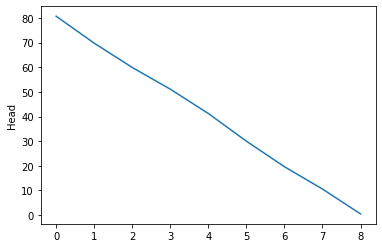

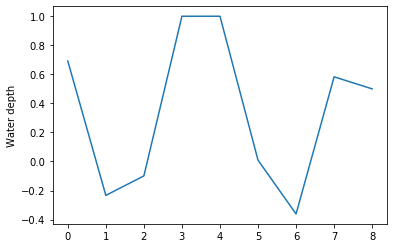

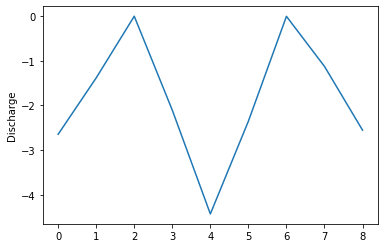

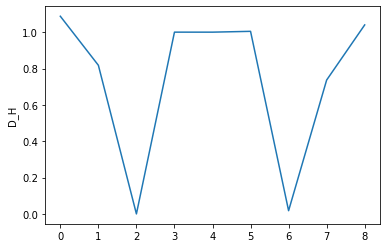

In [52]:
print("Node net fluxes = ",mg.calc_net_flux_at_node(Q)[mg.core_nodes]/mg.dx + mg.at_node['input__discharge'][mg.core_nodes])
print("Node head = ",mg.at_node['hydraulic__head'])

figure()
plot(mg.at_node['hydraulic__head'][11:20])
ylabel('Head')

figure()
water_depth = mg.at_node['hydraulic__head'][11:20] - mg.at_node['junction__elevation'][11:20]
water_depth[water_depth>1.] = 1.
plot(water_depth)
ylabel('Water depth')

figure()
plot(Q[mg.active_links])
ylabel('Discharge')

figure()
plot(mg.at_link['hydraulic__diameter'][mg.active_links])
ylabel('D_H')

print('Discharge=',Q[mg.active_links])
print('D_H=',mg.at_link['hydraulic__diameter'][mg.active_links])

In [20]:
mg = RasterModelGrid((5,5),100)
junc_elev = mg.add_zeros('node', 'junction__elevation')
R = mg.add_zeros('node', 'input__discharge')
h = mg.add_zeros('node', 'hydraulic__head')
Q = mg.add_zeros('link', 'conduit__discharge')
mg.add_zeros('node','storage')
mg.at_node['storage']=10.*np.ones(mg.number_of_nodes)

mg.at_node['junction__elevation'] = -0.01*mg.node_x + 4.


w = mg.add_zeros('link','width')
mg.at_link['width']= 0.5*np.ones(mg.number_of_links)#.*np.random.rand(mg.number_of_active_links)

d_h = mg.add_zeros('link','hydraulic__diameter')
mg.at_link['hydraulic__diameter'] = w

mg.at_node['input__discharge'][12]=0.05

#Set up link elevation offsets
xc_min_head = mg.add_zeros('link', 'conduit_head__offset')
xc_min_tail = mg.add_zeros('link', 'conduit_tail__offset')
y_max = mg.add_zeros('link', 'maximum__depth')
mg.at_link['maximum__depth']= w#mg.at_link['hydraulic__diameter']#applicable for square conduits



#set heads at edges
h[mg.nodes_at_left_edge] = 4.2
h[mg.nodes_at_right_edge] = 0.
h[mg.nodes_at_top_edge] = 0.
h[mg.nodes_at_bottom_edge] = 0.

mg.set_closed_boundaries_at_grid_edges(False,True,False,True)
Q[mg.active_links] = 0.#0.1*np.random.rand(mg.number_of_active_links)
n_core = mg.number_of_core_nodes
links = mg.links_at_node
print("Number of links = ", mg.number_of_links)
print("Number of nodes = ", mg.number_of_nodes)
print("Number of active links = ", mg.number_of_active_links)
print("Number of core nodes = ", mg.number_of_core_nodes)


pfn = PresFlowNetwork(mg)


Number of links =  40
Number of nodes =  25
Number of active links =  18
Number of core nodes =  9


In [8]:
mg.calc_net_flux_at_node(Q)[mg.core_nodes]/mg.dx - mg.at_node['input__discharge'][mg.core_nodes]

array([  1.50350309e-01,   1.95539803e-09,   8.41032719e-02,
         1.50350310e-01,  -5.00000011e-02,   8.41032727e-02,
         1.50350309e-01,   1.95539803e-09,   8.41032719e-02])

In [21]:
for i in arange(500):
    print('Time iteration:', i)
    pfn.dyn_wave_solution(dt=5.)

Time iteration: 0
max change in h:  0.00624999846719
max change in h:  0.00312499998806
max change in h:  0.00156250035591
max change in h:  0.000781250332019
max change in h:  0.000390625209346
max change in h:  0.000195312607906
max change in h:  0.000675557188024
max change in h:  0.00305957032746
max change in h:  0.0105381863919
max change in h:  0.00725064368962
max change in h:  0.0041586203004
max change in h:  0.00222711783631
max change in h:  0.00115316599532
max change in h:  0.000586228797804
max change in h:  0.000294910608406
max change in h:  0.000147451708341
max change in h:  7.34562679073e-05
average dh= 0.0129024910041   average abs(dQ)= 0.0202490671414
Time iteration: 1
max change in h:  0.0183385479768
max change in h:  0.00936328553833
max change in h:  0.00471649483183
max change in h:  0.00235976505261
max change in h:  0.00117653968185
max change in h:  0.000585544663148
max change in h:  0.000291141915632
max change in h:  0.0001446891683
max change in h:  7.

max change in h:  0.00114275701644
max change in h:  0.000567247749253
max change in h:  0.000281553800715
max change in h:  0.000139744038729
max change in h:  6.93579033637e-05
average dh= 0.0277831768403   average abs(dQ)= 0.000363688020443
Time iteration: 21
max change in h:  0.0184983326994
max change in h:  0.00919559514918
max change in h:  0.00456769356744
max change in h:  0.00226793248017
max change in h:  0.00112579906238
max change in h:  0.000558772058395
max change in h:  0.000277317196227
max change in h:  0.000137626259291
max change in h:  6.82992629502e-05
average dh= 0.0274201741593   average abs(dQ)= 0.000363688026154
Time iteration: 22
max change in h:  0.0182260564411
max change in h:  0.00905961690631
max change in h:  0.00449977504786
max change in h:  0.00223400000523
max change in h:  0.00110884240104
max change in h:  0.000550297149648
max change in h:  0.000273081035665
max change in h:  0.000135508722703
max change in h:  6.72407526761e-05
average dh= 0.027

max change in h:  0.000127836981795
max change in h:  6.55436226999e-05
average dh= 0.019511763073   average abs(dQ)= 0.00402426878871
Time iteration: 44
max change in h:  0.0124744092639
max change in h:  0.00665698927516
max change in h:  0.00353972587685
max change in h:  0.00186753077877
max change in h:  0.000976142608598
max change in h:  0.000505471630082
max change in h:  0.000259508064442
max change in h:  0.000132240058352
max change in h:  6.69678416965e-05
average dh= 0.0192652219069   average abs(dQ)= 0.00339019094257
Time iteration: 45
max change in h:  0.0144787256196
max change in h:  0.0075188680498
max change in h:  0.00389391161919
max change in h:  0.00200652575673
max change in h:  0.00102795445341
max change in h:  0.000523587370316
max change in h:  0.000265282899267
max change in h:  0.000133797638694
max change in h:  6.72280338014e-05
average dh= 0.019083036097   average abs(dQ)= 0.00240031909813
Time iteration: 46
max change in h:  0.0158742108638
max change 

max change in h:  0.000515149223876
max change in h:  0.000256726617614
max change in h:  0.000127949445962
max change in h:  6.37730645798e-05
average dh= 0.0185969337162   average abs(dQ)= 0.000195475751501
Time iteration: 69
max change in h:  0.016626187639
max change in h:  0.00828873513056
max change in h:  0.00413028117283
max change in h:  0.00205762779609
max change in h:  0.00102499126866
max change in h:  0.00051060382037
max change in h:  0.000254379625919
max change in h:  0.000126742954711
max change in h:  6.31549865293e-05
average dh= 0.0185866487918   average abs(dQ)= 0.000219333657171
Time iteration: 70
max change in h:  0.0164961775678
max change in h:  0.00822119816445
max change in h:  0.00409509904709
max change in h:  0.00203930521251
max change in h:  0.00101546926291
max change in h:  0.000505670311484
max change in h:  0.000251831795962
max change in h:  0.000125431182755
max change in h:  6.24813786725e-05
average dh= 0.0185759373666   average abs(dQ)= 0.00024

max change in h:  0.00411741938194
max change in h:  0.00204445119633
max change in h:  0.00101467830705
max change in h:  0.00050356701972
max change in h:  0.000249965160503
max change in h:  0.000124124883591
max change in h:  6.16621061521e-05
average dh= 0.0155927524962   average abs(dQ)= 0.000223921718299
Time iteration: 95
max change in h:  0.0165154468922
max change in h:  0.00821152788463
max change in h:  0.0040771305098
max change in h:  0.00202276759361
max change in h:  0.00100323151094
max change in h:  0.000497581994834
max change in h:  0.000246847558265
max change in h:  0.000122501932358
max change in h:  6.08167441827e-05
average dh= 0.0155048337475   average abs(dQ)= 0.000262361185975
Time iteration: 96
max change in h:  0.0162958651115
max change in h:  0.00809749598732
max change in h:  0.00401880139825
max change in h:  0.00199307009832
max change in h:  0.000988079840472
max change in h:  0.00048980669829
max change in h:  0.000242829529484
max change in h:  0.0

max change in h:  5.18868600974e-07
average dh= 5.22771629656e-09   average abs(dQ)= 1.36113815666e-06
Time iteration: 150
max change in h:  1.81997778848e-07
average dh= 5.41415793367e-09   average abs(dQ)= 1.03010062423e-06
Time iteration: 151
max change in h:  1.98694293685e-07
average dh= 5.18237330597e-09   average abs(dQ)= 6.97915387604e-07
Time iteration: 152
max change in h:  6.21893939901e-07
average dh= 4.65942713162e-09   average abs(dQ)= 3.8792646704e-07
Time iteration: 153
max change in h:  9.12159153321e-07
average dh= 3.95214363686e-09   average abs(dQ)= 3.69857936587e-07
Time iteration: 154
max change in h:  1.07783776282e-06
average dh= 3.14896521972e-09   average abs(dQ)= 4.7823822375e-07
Time iteration: 155
max change in h:  1.13398737822e-06
average dh= 2.32172574287e-09   average abs(dQ)= 5.39726362718e-07
Time iteration: 156
max change in h:  1.09994582864e-06
average dh= 1.52710770345e-09   average abs(dQ)= 5.50583620189e-07
Time iteration: 157
max change in h:  

max change in h:  3.42510464435e-11
average dh= -1.72743980578e-13   average abs(dQ)= 4.61250603292e-11
Time iteration: 236
max change in h:  1.06814557199e-11
average dh= -1.78537966625e-13   average abs(dQ)= 3.43838696408e-11
Time iteration: 237
max change in h:  4.1795455985e-12
average dh= -1.70455707805e-13   average abs(dQ)= 2.27051192141e-11
Time iteration: 238
max change in h:  1.14801501638e-11
average dh= -1.5202444049e-13   average abs(dQ)= 1.2587245473e-11
Time iteration: 239
max change in h:  1.64157576421e-11
average dh= -1.2674897108e-13   average abs(dQ)= 1.34352759826e-11
Time iteration: 240
max change in h:  1.91398008553e-11
average dh= -9.78689419244e-14   average abs(dQ)= 1.72925103749e-11
Time iteration: 241
max change in h:  1.99298355597e-11
average dh= -6.81959195904e-14   average abs(dQ)= 1.91530201258e-11
Time iteration: 242
max change in h:  1.91409110784e-11
average dh= -4.00032167885e-14   average abs(dQ)= 1.92620882051e-11
Time iteration: 243
max change i

max change in h:  8.881784197e-16
average dh= 4.19976553534e-17   average abs(dQ)= 5.53468644854e-16
Time iteration: 331
max change in h:  6.66133814775e-16
average dh= 3.20239591018e-17   average abs(dQ)= 4.96410999691e-16
Time iteration: 332
max change in h:  4.4408920985e-16
average dh= 2.2505145895e-17   average abs(dQ)= 3.88037463369e-16
Time iteration: 333
max change in h:  2.22044604925e-16
average dh= 1.55469772858e-17   average abs(dQ)= 3.21560811832e-16
Time iteration: 334
max change in h:  0.0
average dh= 8.14067177865e-18   average abs(dQ)= 2.24337993687e-16
Time iteration: 335
max change in h:  2.22044604925e-16
average dh= -9.55061647052e-19   average abs(dQ)= 1.45067756515e-16
Time iteration: 336
max change in h:  2.22044604925e-16
average dh= -1.03823200037e-17   average abs(dQ)= 8.98698192446e-17
Time iteration: 337
max change in h:  0.0
average dh= -2.48585874107e-17   average abs(dQ)= 1.19278803173e-16
Time iteration: 338
max change in h:  0.0
average dh= -3.92741394

max change in h:  0.0
average dh= -3.89850189168e-17   average abs(dQ)= 9.42352388252e-18
Time iteration: 421
max change in h:  0.0
average dh= -3.93049790246e-17   average abs(dQ)= 9.39641882821e-18
Time iteration: 422
max change in h:  0.0
average dh= -3.91459627059e-17   average abs(dQ)= 9.39039548281e-18
Time iteration: 423
max change in h:  0.0
average dh= -3.90023661515e-17   average abs(dQ)= 9.3843721374e-18
Time iteration: 424
max change in h:  0.0
average dh= -3.88587695971e-17   average abs(dQ)= 9.37985462835e-18
Time iteration: 425
max change in h:  0.0
average dh= -3.86987895432e-17   average abs(dQ)= 9.3753371193e-18
Time iteration: 426
max change in h:  0.0
average dh= -3.90486254442e-17   average abs(dQ)= 9.3693137739e-18
Time iteration: 427
max change in h:  0.0
average dh= -3.93994250805e-17   average abs(dQ)= 9.36630210119e-18
Time iteration: 428
max change in h:  0.0
average dh= -3.92558285261e-17   average abs(dQ)= 9.31058615622e-18
Time iteration: 429
max change in

In [10]:
#h_new_solver = h.copy()
#Q_new_solver = Q.copy()
#h[mg.core_nodes]
#mg.at_link['hydraulic__diameter']
mg.at_node['junction__elevation']

array([ 4.,  3.,  2.,  1.,  0.,  4.,  3.,  2.,  1.,  0.,  4.,  3.,  2.,
        1.,  0.,  4.,  3.,  2.,  1.,  0.,  4.,  3.,  2.,  1.,  0.])

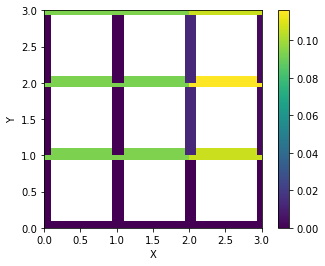

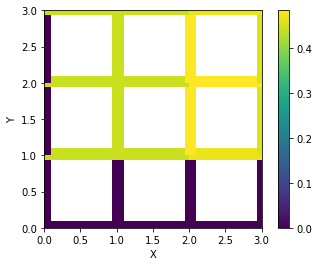

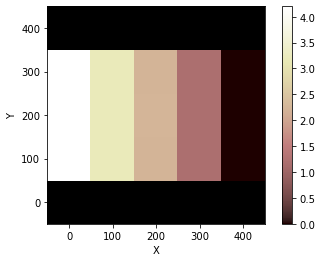

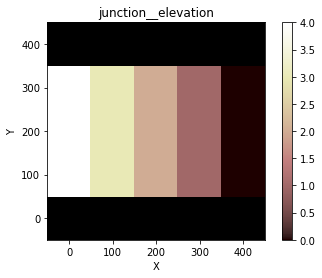

In [15]:
figure()
plot_links(mg, 'conduit__discharge',magnitude=True)
figure()
plot_links(mg, 'hydraulic__diameter')
figure()
imshow_grid_at_node(mg, h)
figure()
imshow_grid_at_node(mg, 'junction__elevation')


In [9]:
FUDGE=0.0001
active_links = mg.active_links
head_nodes = mg.node_at_link_head[active_links]
tail_nodes = mg.node_at_link_tail[active_links]
h_head = mg.at_node['hydraulic__head'][head_nodes]
h_tail = mg.at_node['hydraulic__head'][tail_nodes]
#Calculate flow depths using offset and junction elevations
y_head = h_head - mg.at_node['junction__elevation'][head_nodes] \
         - mg.at_link['conduit_head__offset'][active_links]
y_tail = h_tail - mg.at_node['junction__elevation'][tail_nodes] \
          - mg.at_link['conduit_tail__offset'][active_links]
y_head[y_head>mg.at_link['maximum__depth'][active_links]] = mg.at_link['maximum__depth'][active_links][y_head>mg.at_link['maximum__depth'][active_links]]
y_tail[y_tail>mg.at_link['maximum__depth'][active_links]] = mg.at_link['maximum__depth'][active_links][y_tail>mg.at_link['maximum__depth'][active_links]]
y_avg = 0.5*(y_head + y_tail)
A_avg = mg.at_link['width'][active_links] * y_avg
y_avg[y_avg<FUDGE] = FUDGE
A_avg[A_avg<FUDGE] = FUDGE

In [10]:
h_head>h_tail

array([False, False, False, False, False, False, False, False, False], dtype=bool)

In [22]:
#y_tail[y_tail>mg.at_link['maximum__depth'][active_links]] = 
#mg.at_link['maximum__depth'][active_links][y_tail>mg.at_link['maximum__depth'][active_links]]
d_h_square(mg.at_link['width'][active_links], y_avg)

array([  3.96936126e-01,   3.53636005e-04,   3.99594057e-04,
         3.99687423e-04,   3.99814040e-04,   3.99715864e-04,
         3.99694894e-04,   4.90132384e-01,   3.99793756e-04,
         3.96927434e-04,   3.99777355e-04,   3.99802869e-04,
         3.99787176e-04,   3.97200621e-04,   2.81319838e-01,
         3.99646193e-04,   3.99446218e-04,   3.99054260e-04])

In [21]:
def d_h_square(width, flow_depth):
    d_H = np.zeros(np.size(width))
    is_full_pipe = np.isclose(width,flow_depth)
    d_H[is_full_pipe] = width[is_full_pipe]
    d_H[~is_full_pipe] = 4.*width[~is_full_pipe]*flow_depth[~is_full_pipe] / (2.*flow_depth[~is_full_pipe] + width[~is_full_pipe])
    return d_H

In [17]:
mg.at_link['hydraulic__diameter'][mg.active_links]

array([ 0.75,  0.75,  0.75,  0.5 ,  0.75,  0.75,  0.75,  0.75,  0.75,
        0.75,  0.5 ,  0.75,  0.75,  0.75,  0.75,  0.75,  0.75,  0.5 ])

In [11]:
pfn.run_one_step()

Number of iterations = 1 tolerance = nan  iteration time= 0.016219377517700195


/home/mcoving/Data/github/landlab/landlab/components/conduit_networks/pressurized_flow.py:186: RuntimeWarning: divide by zero encountered in true_divide
  self.r = 8*f*L/(g*r_s**2.*d_h**5.)
/home/mcoving/Data/github/landlab/landlab/components/conduit_networks/pressurized_flow.py:267: RuntimeWarning: divide by zero encountered in double_scalars
  ADA_ij[i][j] = -1./(a[this_link]*r[this_link]*np.fabs(self.Q[this_link])**(a[this_link]-1))
/home/mcoving/anaconda3/envs/landlab_dev/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:198: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
/home/mcoving/Data/github/landlab/landlab/components/conduit_networks/pressurized_flow.py:277: RuntimeWarning: divide by zero encountered in true_divide
  dQ= -(1./a[self.grid.active_links])*self.Q[self.grid.active_links] - 1./(a[self.grid.active_links]*r[self.grid.active_links]*np.fabs(self.Q[self.grid.active_links])**(a[self.grid.active_link

In [5]:
d_h.copy()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [54]:
mg.at_node['junction__elevation']

array([ 4.,  3.,  2.,  1.,  0.,  4.,  3.,  2.,  1.,  0.,  4.,  3.,  2.,
        1.,  0.,  4.,  3.,  2.,  1.,  0.,  4.,  3.,  2.,  1.,  0.])